In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Loading data
SC = pd.read_csv('C:/Users/User/Desktop/seungchon_2016-2023.csv', encoding='cp949')
JS = pd.read_csv('C:/Users/User/Desktop/juksan_2016-2023.csv', encoding='cp949')

In [3]:
# function 1
def my_level(x) :
    if x <= 1 :
        return "Very good"
    elif 1 < x <= 2 :
        return "Good"
    elif 2 < x <= 3 :
        return "Slightly good"
    elif 3 < x <= 5 :
        return "Normal"
    elif 5 < x <= 8 :
        return "Slightly bad"
    elif 8 < x <= 10 :
        return "Bad"
    else :
        return "Very bad"

In [20]:
# function 2 (recommend)
def my_level(x) :
    if x <= 3 :
        return "Good"
    elif 3 < x <= 5 :
        return "Normal"
    else :
        return "Bad"

In [21]:
SC["level"] = SC["BOD"].apply(lambda x : my_level(x))
JS["level"] = JS["BOD"].apply(lambda x : my_level(x))

In [22]:
SC.head()

,Year,Month,Date,Spot,Time,BOD,COD,TN,TP,TOC,...,DO,EC,Chla,WT,WL,WS,RF,TI,TD,level
0,2016,1,2016.01.04,광산,0,2.3,4.9,5.535,0.081,4.5,...,11.8,406,16.9,7.7,7.51,8.990,0.0000,14.850,15.070,Good
1,2016,1,2016.01.11,광산,7,2.9,5.5,6.618,0.161,5.1,...,12.7,416,36.9,7.5,7.50,8.971,0.0000,14.735,15.174,Good
2,2016,1,2016.01.18,광산,14,2.9,6.0,7.880,0.140,5.8,...,13.6,462,38.9,7.0,7.51,8.990,3.7453,15.356,15.136,Good
3,2016,1,2016.01.28,광산,24,2.4,5.0,7.099,0.114,5.7,...,13.1,385,21.2,4.2,7.62,9.216,7.3612,19.858,17.458,Good
4,2016,2,2016.02.02,광산,29,4.2,6.5,4.747,0.232,5.6,...,11.3,371,13.3,4.2,7.55,9.066,0.0000,22.615,23.610,Normal


In [23]:
JS.head()

,Year,Month,Data,Spot,Time,BOD,COD,TN,TP,TOC,...,DO,EC,Chla,WT,WL,WS,RF,TI,TD,level
0,2016,1,2016.01.04,죽산,0,4.1,6.1,4.476,0.092,4.7,...,15.6,348,86.9,6.8,3.51,25.750,0.0000,23.338,23.338,Normal
1,2016,1,2016.01.11,죽산,7,3.6,6.4,4.520,0.092,6.1,...,14.2,345,114.7,5.8,3.48,25.575,0.0000,20.703,23.488,Normal
2,2016,1,2016.01.18,죽산,14,4.1,7.1,5.105,0.075,6.8,...,17.0,379,112.9,5.3,3.53,25.882,3.8457,22.312,20.022,Normal
3,2016,1,2016.01.28,죽산,24,4.9,8.2,5.698,0.113,7.7,...,15.8,376,116.6,3.2,3.54,25.948,9.4872,29.833,25.522,Normal
4,2016,2,2016.02.02,죽산,29,2.9,5.9,5.458,0.146,5.3,...,14.1,408,32.6,3.4,3.53,25.882,0.0000,41.374,45.953,Good


In [24]:
SC_train = SC.loc[SC['Year']!=2023]
SC_test = SC.loc[SC['Year']==2023]
SC_train_variables = SC_train.iloc[:,5:25].drop(labels="level", axis=1)
SC_train_level = SC_train.iloc[:,5:25].iloc[:,-1]
SC_test_variables = SC_test.iloc[:,5:25].drop(labels="level", axis=1)
SC_test_level = SC_test.iloc[:,5:25].iloc[:,-1]

In [25]:
JS_train = JS.loc[JS['Year']!=2023]
JS_test = JS.loc[JS['Year']==2023]
JS_train_variables = JS_train.iloc[:,5:25].drop(labels="level", axis=1)
JS_train_level = JS_train.iloc[:,5:25].iloc[:,-1]
JS_test_variables = JS_test.iloc[:,5:25].drop(labels="level", axis=1)
JS_test_level = JS_test.iloc[:,5:25].iloc[:,-1]

In [11]:
### Sampling for imbalanced data
!pip install -U imbalanced-learn

In [12]:
from sklearn.datasets import make_classification
from collections import Counter

In [13]:
from matplotlib import pyplot as plt
import seaborn as sns

In [14]:
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours 
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek

In [47]:
import scipy as sc
from sklearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from imblearn.under_sampling import *

n0 = 200; n1 = 20
rv1 = sc.stats.multivariate_normal([-1, 0], [[1, 0], [0, 1]])
rv2 = sc.stats.multivariate_normal([+1, 0], [[1, 0], [0, 1]])
X0 = rv1.rvs(n0, random_state=0)
X1 = rv2.rvs(n1, random_state=0)
X_imb = np.vstack([X0, X1])
y_imb = np.hstack([np.zeros(n0), np.ones(n1)])

x1min = -4; x1max = 4
x2min = -2; x2max = 2
xx1 = np.linspace(x1min, x1max, 1000)
xx2 = np.linspace(x2min, x2max, 1000)
X1, X2 = np.meshgrid(xx1, xx2)

def classification_result2(X, y, title=""):
    plt.contour(X1, X2, rv1.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    plt.contour(X1, X2, rv2.pdf(np.dstack([X1, X2])), levels=[0.05], linestyles="dashed")
    model = SVC(kernel="linear", C=1e4, random_state=0).fit(X, y)
    Y = np.reshape(model.predict(np.array([X1.ravel(), X2.ravel()]).T), X1.shape)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label="class 1")
    plt.contour(X1, X2, Y, colors='k', levels=[0.5])
    y_pred = model.predict(X)
    plt.xlim(-4, 4)
    plt.ylim(-3, 3)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title(title)
    return model

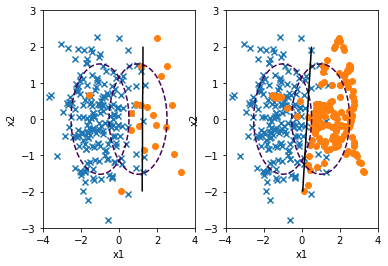

In [48]:
# SMOTE
X_samp, y_samp = SMOTE(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE.png')

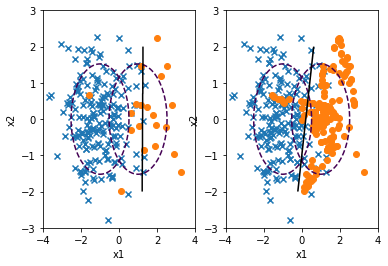

In [49]:
# ADASYN
X_samp, y_samp = ADASYN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('ADASYN.png')

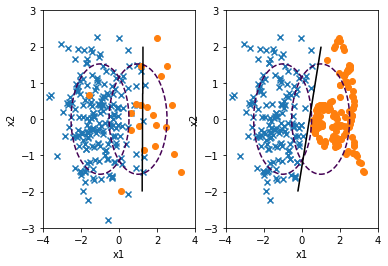

In [50]:
# SMOTE-ENN
X_samp, y_samp = SMOTEENN(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-ENN.png')

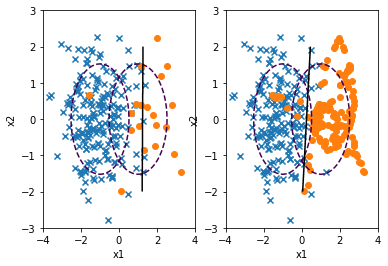

In [51]:
# SMOTE-Tomek
X_samp, y_samp = SMOTETomek(random_state=5790).fit_resample(X_imb, y_imb)

plt.subplot(121)
classification_result2(X_imb, y_imb)
plt.subplot(122)
model_samp = classification_result2(X_samp, y_samp)
plt.savefig('SMOTE-Tomek.png')

In [26]:
### Making training data with sampling techniques for imbalanced data
## Seungchon
Counter(SC_train_level)

Counter({'Good': 22, 'Normal': 141, 'Bad': 190})

In [27]:
Counter(SC_test_level)

Counter({'Bad': 27, 'Normal': 10, 'Good': 5})

In [53]:
SC_train_x = SC_train_variables.drop(labels="Chla", axis=1)
SC_train_y = SC_train_variables.iloc[:,-7]
SC_test_x = SC_test_variables.drop(labels="Chla", axis=1)
SC_test_y = SC_test_variables.iloc[:,-7]

In [54]:
# SMOTE
sm_sample = SMOTE(random_state=5790) 
SC_train_variables_sm, SC_train_level_sm = sm_sample.fit_resample(SC_train_variables, SC_train_level)

In [55]:
Counter(SC_train_level_sm)

Counter({'Good': 190, 'Normal': 190, 'Bad': 190})

In [56]:
SC_train_x_sm = SC_train_variables_sm.drop(labels="Chla", axis=1)
SC_train_y_sm = SC_train_variables_sm.iloc[:,-7]

In [57]:
# ADASYN
ads_sample = ADASYN(random_state=5790) 
SC_train_variables_ads, SC_train_level_ads = ads_sample.fit_resample(SC_train_variables, SC_train_level)

In [58]:
Counter(SC_train_level_ads)

Counter({'Good': 182, 'Normal': 175, 'Bad': 190})

In [59]:
SC_train_x_ads = SC_train_variables_ads.drop(labels="Chla", axis=1)
SC_train_y_ads = SC_train_variables_ads.iloc[:,-7]

In [60]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=5790) 
SC_train_variables_sme, SC_train_level_sme = sme_sample.fit_resample(SC_train_variables, SC_train_level)

In [61]:
Counter(SC_train_level_sme)

Counter({'Bad': 72, 'Good': 170, 'Normal': 60})

In [62]:
SC_train_x_sme = SC_train_variables_sme.drop(labels="Chla", axis=1)
SC_train_y_sme = SC_train_variables_sme.iloc[:,-7]

In [63]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=5790) 
SC_train_variables_smt, SC_train_level_smt = smt_sample.fit_resample(SC_train_variables, SC_train_level)

In [64]:
Counter(SC_train_level_smt)

Counter({'Good': 186, 'Normal': 172, 'Bad': 174})

In [65]:
SC_train_x_smt = SC_train_variables_smt.drop(labels="Chla", axis=1)
SC_train_y_smt = SC_train_variables_smt.iloc[:,-7]

In [28]:
## Juksan
Counter(JS_train_level)

Counter({'Normal': 180, 'Good': 54, 'Bad': 120})

In [29]:
Counter(JS_test_level)

Counter({'Bad': 20, 'Normal': 16, 'Good': 6})

In [67]:
JS_train_x = JS_train_variables.drop(labels="Chla", axis=1)
JS_train_y = JS_train_variables.iloc[:,-7]
JS_test_x = JS_test_variables.drop(labels="Chla", axis=1)
JS_test_y = JS_test_variables.iloc[:,-7]

In [68]:
# SMOTE
sm_sample = SMOTE(random_state=5790) 
JS_train_variables_sm, JS_train_level_sm = sm_sample.fit_resample(JS_train_variables, JS_train_level)

In [69]:
Counter(JS_train_level_sm)

Counter({'Normal': 180, 'Good': 180, 'Bad': 180})

In [70]:
JS_train_x_sm = JS_train_variables_sm.drop(labels="Chla", axis=1)
JS_train_y_sm = JS_train_variables_sm.iloc[:,-7]

In [71]:
# ADASYN
ads_sample = ADASYN(random_state=5790) 
JS_train_variables_ads, JS_train_level_ads = ads_sample.fit_resample(JS_train_variables, JS_train_level)

In [72]:
Counter(JS_train_level_ads)

Counter({'Normal': 180, 'Good': 183, 'Bad': 183})

In [73]:
JS_train_x_ads = JS_train_variables_ads.drop(labels="Chla", axis=1)
JS_train_y_ads = JS_train_variables_ads.iloc[:,-7]

In [74]:
# SMOTE-ENN
sme_sample = SMOTEENN(random_state=5790) 
JS_train_variables_sme, JS_train_level_sme = sme_sample.fit_resample(JS_train_variables, JS_train_level)

In [75]:
Counter(JS_train_level_sme)

Counter({'Bad': 72, 'Good': 128, 'Normal': 22})

In [76]:
JS_train_x_sme = JS_train_variables_sme.drop(labels="Chla", axis=1)
JS_train_y_sme = JS_train_variables_sme.iloc[:,-7]

In [77]:
# SMOTE-Tomek
smt_sample = SMOTETomek(random_state=5790) 
JS_train_variables_smt, JS_train_level_smt = smt_sample.fit_resample(JS_train_variables, JS_train_level)

In [78]:
Counter(JS_train_level_smt)

Counter({'Normal': 158, 'Good': 171, 'Bad': 159})

In [79]:
JS_train_x_smt = JS_train_variables_smt.drop(labels="Chla", axis=1)
JS_train_y_smt = JS_train_variables_smt.iloc[:,-7]

In [80]:
### DNN, CNN
# Install tensorflow first! (important!!)
!pip install tensorflow 

In [81]:
!pip install Keras

In [82]:
import tensorflow as tf

In [83]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [84]:
## DNN model (SC)
# model
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 activation_2 (Activation)   (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0

In [86]:
# Original
hist = model.fit(
    SC_train_x, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 1s - loss: 4863.0361 - mean_squared_error: 4863.0361 - mean_absolute_error: 55.2413 - val_loss: 2375.6765 - val_mean_squared_error: 2375.6765 - val_mean_absolute_error: 36.7334 - 502ms/epoch - 56ms/step
Epoch 2/100
9/9 - 0s - loss: 2280.0542 - mean_squared_error: 2280.0542 - mean_absolute_error: 32.1523 - val_loss: 1443.1248 - val_mean_squared_error: 1443.1248 - val_mean_absolute_error: 27.5273 - 26ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 1840.1158 - mean_squared_error: 1840.1158 - mean_absolute_error: 30.8272 - val_loss: 1343.2856 - val_mean_squared_error: 1343.2856 - val_mean_absolute_error: 26.9640 - 24ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1901.2017 - mean_squared_error: 1901.2017 - mean_absolute_error: 32.2236 - val_loss: 1337.4480 - val_mean_squared_error: 1337.4480 - val_mean_absolute_error: 26.7842 - 22ms/epoch - 2ms/step
Epoch 5/100
9/9 - 0s - loss: 1790.5369 - mean_squared_error: 1790.5369 - mean_absolute_error: 30.5618 - val_loss: 1338.416

Epoch 39/100
9/9 - 0s - loss: 1180.9591 - mean_squared_error: 1180.9591 - mean_absolute_error: 23.6918 - val_loss: 918.7825 - val_mean_squared_error: 918.7825 - val_mean_absolute_error: 23.0960 - 22ms/epoch - 2ms/step
Epoch 40/100
9/9 - 0s - loss: 1161.7778 - mean_squared_error: 1161.7778 - mean_absolute_error: 23.2441 - val_loss: 909.0460 - val_mean_squared_error: 909.0460 - val_mean_absolute_error: 22.9994 - 23ms/epoch - 3ms/step
Epoch 41/100
9/9 - 0s - loss: 1230.4181 - mean_squared_error: 1230.4181 - mean_absolute_error: 25.1611 - val_loss: 907.7973 - val_mean_squared_error: 907.7973 - val_mean_absolute_error: 22.9838 - 22ms/epoch - 2ms/step
Epoch 42/100
9/9 - 0s - loss: 1187.6165 - mean_squared_error: 1187.6165 - mean_absolute_error: 24.0123 - val_loss: 886.5987 - val_mean_squared_error: 886.5987 - val_mean_absolute_error: 22.5586 - 21ms/epoch - 2ms/step
Epoch 43/100
9/9 - 0s - loss: 1249.8998 - mean_squared_error: 1249.8998 - mean_absolute_error: 24.1055 - val_loss: 878.9112 - va

Epoch 77/100
9/9 - 0s - loss: 795.8651 - mean_squared_error: 795.8651 - mean_absolute_error: 20.0033 - val_loss: 667.0805 - val_mean_squared_error: 667.0805 - val_mean_absolute_error: 19.0157 - 22ms/epoch - 2ms/step
Epoch 78/100
9/9 - 0s - loss: 897.4456 - mean_squared_error: 897.4456 - mean_absolute_error: 21.0951 - val_loss: 678.7491 - val_mean_squared_error: 678.7491 - val_mean_absolute_error: 19.0526 - 21ms/epoch - 2ms/step
Epoch 79/100
9/9 - 0s - loss: 865.4834 - mean_squared_error: 865.4834 - mean_absolute_error: 20.6275 - val_loss: 784.4964 - val_mean_squared_error: 784.4964 - val_mean_absolute_error: 21.7997 - 21ms/epoch - 2ms/step
Epoch 80/100
9/9 - 0s - loss: 881.0737 - mean_squared_error: 881.0737 - mean_absolute_error: 21.5353 - val_loss: 702.8324 - val_mean_squared_error: 702.8324 - val_mean_absolute_error: 18.9309 - 22ms/epoch - 2ms/step
Epoch 81/100
9/9 - 0s - loss: 950.2358 - mean_squared_error: 950.2357 - mean_absolute_error: 22.1590 - val_loss: 688.2235 - val_mean_squ

In [87]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 997us/step - loss: 322.3039 - mean_squared_error: 322.3039 - mean_absolute_error: 13.7309
test_loss:  322.3038635253906
test_mae:  322.3038635253906


In [88]:
SC_test_y_pred_DNN = model.predict(SC_test_x)
SC_test_y_pred_DNN

2/2 [==============================] - 0s 997us/step


array([[44.499744 ],
       [55.263195 ],
       [45.600613 ],
       [46.8042   ],
       [63.434856 ],
       [51.20872  ],
       [52.38599  ],
       [58.269283 ],
       [33.043232 ],
       [55.085045 ],
       [54.491966 ],
       [78.87746  ],
       [24.757452 ],
       [85.22242  ],
       [56.734417 ],
       [16.73457  ],
       [77.735374 ],
       [59.294987 ],
       [51.23937  ],
       [10.584455 ],
       [19.110783 ],
       [12.001816 ],
       [ 7.0696836],
       [ 4.4932084],
       [74.74673  ],
       [31.590578 ],
       [65.42986  ],
       [46.316242 ],
       [11.306412 ],
       [28.977203 ],
       [59.93588  ],
       [11.568883 ],
       [19.02274  ],
       [38.16085  ],
       [66.920395 ],
       [69.11041  ],
       [77.79122  ],
       [81.6041   ],
       [44.5015   ],
       [70.89603  ],
       [28.544718 ],
       [54.012814 ]], dtype=float32)

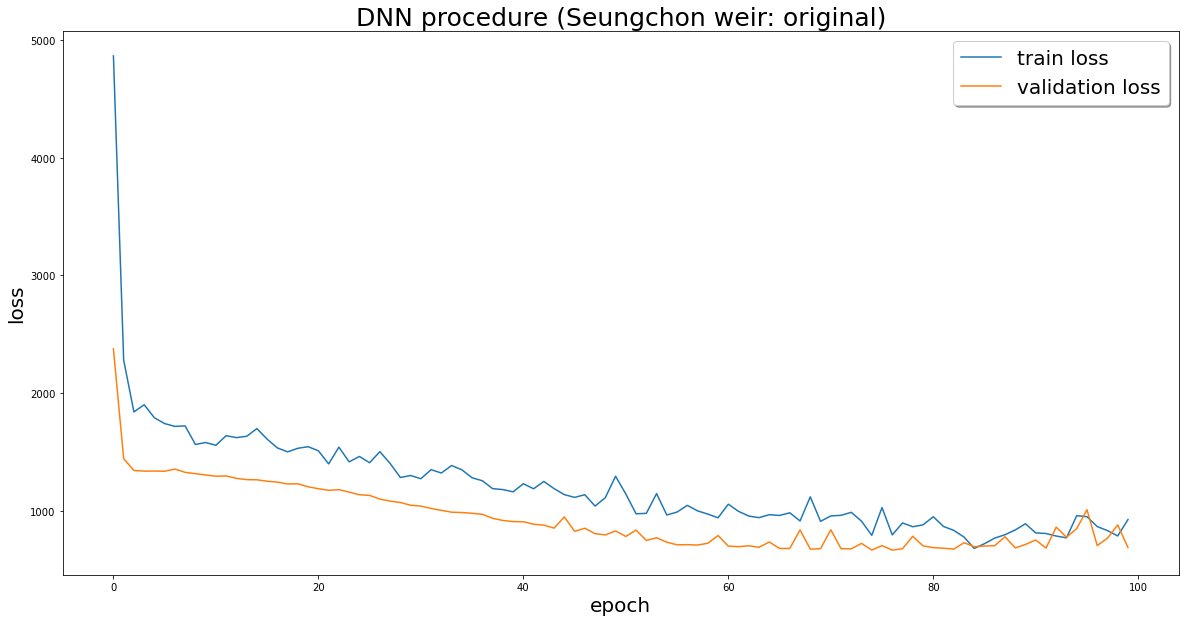

In [89]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_python.png')

In [90]:
# SMOTE
hist = model.fit(
    SC_train_x_sm, SC_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
15/15 - 0s - loss: 659.9413 - mean_squared_error: 659.9413 - mean_absolute_error: 18.0665 - val_loss: 130.2340 - val_mean_squared_error: 130.2340 - val_mean_absolute_error: 8.6710 - 49ms/epoch - 3ms/step
Epoch 2/100
15/15 - 0s - loss: 680.8374 - mean_squared_error: 680.8374 - mean_absolute_error: 17.8967 - val_loss: 109.9200 - val_mean_squared_error: 109.9200 - val_mean_absolute_error: 7.7126 - 26ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 630.3307 - mean_squared_error: 630.3307 - mean_absolute_error: 17.2515 - val_loss: 145.7723 - val_mean_squared_error: 145.7723 - val_mean_absolute_error: 9.2905 - 26ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 554.6077 - mean_squared_error: 554.6077 - mean_absolute_error: 16.8239 - val_loss: 197.9020 - val_mean_squared_error: 197.9020 - val_mean_absolute_error: 11.4669 - 25ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 644.4520 - mean_squared_error: 644.4520 - mean_absolute_error: 18.0034 - val_loss: 160.0149 - val_mean_s

Epoch 39/100
15/15 - 0s - loss: 580.7136 - mean_squared_error: 580.7136 - mean_absolute_error: 16.4301 - val_loss: 161.2880 - val_mean_squared_error: 161.2880 - val_mean_absolute_error: 9.5334 - 25ms/epoch - 2ms/step
Epoch 40/100
15/15 - 0s - loss: 562.3112 - mean_squared_error: 562.3112 - mean_absolute_error: 16.3446 - val_loss: 123.8448 - val_mean_squared_error: 123.8448 - val_mean_absolute_error: 8.2858 - 24ms/epoch - 2ms/step
Epoch 41/100
15/15 - 0s - loss: 539.5682 - mean_squared_error: 539.5682 - mean_absolute_error: 16.0446 - val_loss: 98.1901 - val_mean_squared_error: 98.1901 - val_mean_absolute_error: 7.0315 - 25ms/epoch - 2ms/step
Epoch 42/100
15/15 - 0s - loss: 552.0482 - mean_squared_error: 552.0482 - mean_absolute_error: 15.8437 - val_loss: 105.8044 - val_mean_squared_error: 105.8044 - val_mean_absolute_error: 7.6265 - 26ms/epoch - 2ms/step
Epoch 43/100
15/15 - 0s - loss: 541.1136 - mean_squared_error: 541.1136 - mean_absolute_error: 16.4789 - val_loss: 121.8487 - val_mean

Epoch 77/100
15/15 - 0s - loss: 501.1801 - mean_squared_error: 501.1801 - mean_absolute_error: 15.7571 - val_loss: 144.8632 - val_mean_squared_error: 144.8632 - val_mean_absolute_error: 9.4620 - 24ms/epoch - 2ms/step
Epoch 78/100
15/15 - 0s - loss: 465.7406 - mean_squared_error: 465.7406 - mean_absolute_error: 15.6646 - val_loss: 91.7815 - val_mean_squared_error: 91.7815 - val_mean_absolute_error: 7.0672 - 25ms/epoch - 2ms/step
Epoch 79/100
15/15 - 0s - loss: 492.7025 - mean_squared_error: 492.7025 - mean_absolute_error: 15.3797 - val_loss: 103.1376 - val_mean_squared_error: 103.1376 - val_mean_absolute_error: 7.5788 - 26ms/epoch - 2ms/step
Epoch 80/100
15/15 - 0s - loss: 463.8282 - mean_squared_error: 463.8282 - mean_absolute_error: 14.6902 - val_loss: 175.7649 - val_mean_squared_error: 175.7649 - val_mean_absolute_error: 10.2271 - 24ms/epoch - 2ms/step
Epoch 81/100
15/15 - 0s - loss: 486.3300 - mean_squared_error: 486.3300 - mean_absolute_error: 15.5367 - val_loss: 178.1201 - val_mea

In [91]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 326.7206 - mean_squared_error: 326.7206 - mean_absolute_error: 13.6649
test_loss:  326.72064208984375
test_mae:  326.72064208984375


In [92]:
SC_test_y_pred_DNN_sm = model.predict(SC_test_x)
SC_test_y_pred_DNN_sm

2/2 [==============================] - 0s 997us/step


array([[46.161247 ],
       [59.608047 ],
       [52.06991  ],
       [52.716022 ],
       [72.77553  ],
       [57.566177 ],
       [60.207806 ],
       [63.924557 ],
       [29.678743 ],
       [57.07129  ],
       [56.017643 ],
       [77.40195  ],
       [28.857824 ],
       [83.75895  ],
       [47.503197 ],
       [29.460285 ],
       [83.58376  ],
       [55.754642 ],
       [38.816742 ],
       [28.60484  ],
       [16.38218  ],
       [12.593797 ],
       [ 3.5899487],
       [ 3.5719972],
       [67.35928  ],
       [47.614197 ],
       [75.808876 ],
       [51.3366   ],
       [15.530936 ],
       [33.224007 ],
       [67.22121  ],
       [ 8.271662 ],
       [15.57655  ],
       [41.604557 ],
       [64.22805  ],
       [68.15027  ],
       [77.898895 ],
       [79.372826 ],
       [45.303745 ],
       [74.4576   ],
       [22.68056  ],
       [53.177254 ]], dtype=float32)

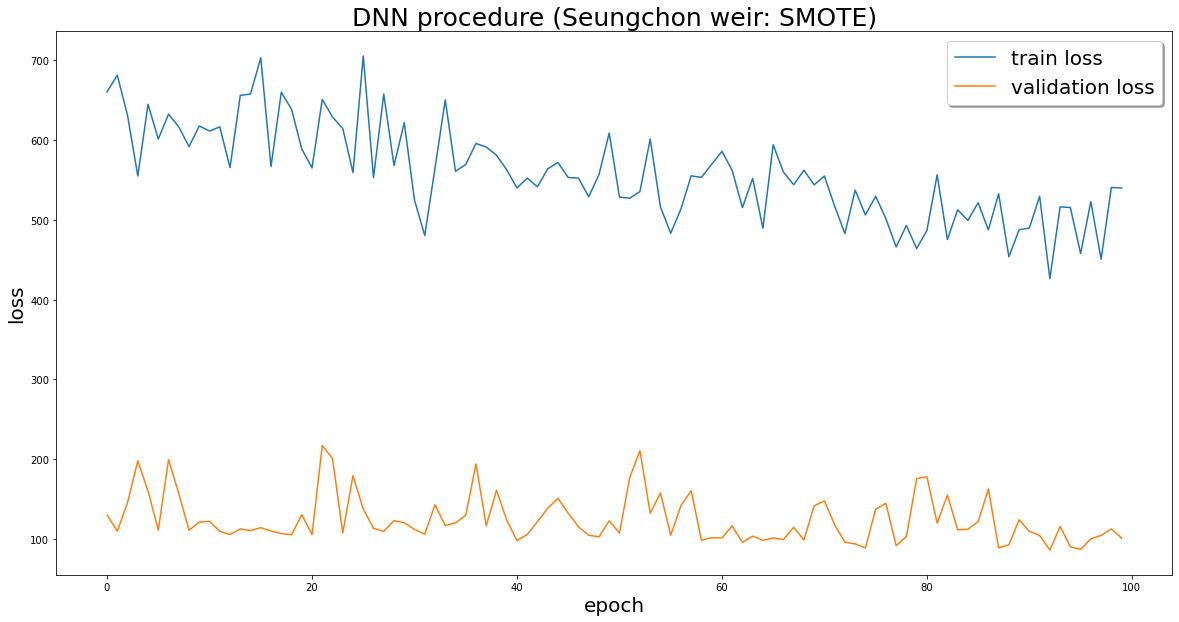

In [93]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE_python.png')

In [94]:
# ADASYN
hist = model.fit(
    SC_train_x_ads, SC_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 564.9695 - mean_squared_error: 564.9695 - mean_absolute_error: 16.7423 - val_loss: 144.7163 - val_mean_squared_error: 144.7163 - val_mean_absolute_error: 7.6278 - 47ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 522.9905 - mean_squared_error: 522.9905 - mean_absolute_error: 16.1103 - val_loss: 146.4589 - val_mean_squared_error: 146.4589 - val_mean_absolute_error: 8.0922 - 24ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 562.9516 - mean_squared_error: 562.9516 - mean_absolute_error: 16.5334 - val_loss: 145.2955 - val_mean_squared_error: 145.2955 - val_mean_absolute_error: 8.6529 - 23ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 581.0493 - mean_squared_error: 581.0493 - mean_absolute_error: 16.5005 - val_loss: 128.4129 - val_mean_squared_error: 128.4129 - val_mean_absolute_error: 7.3004 - 24ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 550.6464 - mean_squared_error: 550.6464 - mean_absolute_error: 16.4880 - val_loss: 128.6313 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 479.5518 - mean_squared_error: 479.5518 - mean_absolute_error: 15.6159 - val_loss: 109.7279 - val_mean_squared_error: 109.7279 - val_mean_absolute_error: 6.9376 - 24ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 432.7581 - mean_squared_error: 432.7581 - mean_absolute_error: 15.0067 - val_loss: 136.8017 - val_mean_squared_error: 136.8017 - val_mean_absolute_error: 7.3201 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 553.6329 - mean_squared_error: 553.6329 - mean_absolute_error: 16.5583 - val_loss: 126.1119 - val_mean_squared_error: 126.1119 - val_mean_absolute_error: 7.2929 - 24ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 460.2584 - mean_squared_error: 460.2584 - mean_absolute_error: 15.0703 - val_loss: 108.3177 - val_mean_squared_error: 108.3177 - val_mean_absolute_error: 6.7876 - 24ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 468.2390 - mean_squared_error: 468.2390 - mean_absolute_error: 15.7237 - val_loss: 114.3415 - val_me

Epoch 77/100
14/14 - 0s - loss: 501.3098 - mean_squared_error: 501.3098 - mean_absolute_error: 15.9327 - val_loss: 135.7299 - val_mean_squared_error: 135.7299 - val_mean_absolute_error: 7.6606 - 23ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 463.9883 - mean_squared_error: 463.9883 - mean_absolute_error: 15.4592 - val_loss: 103.1179 - val_mean_squared_error: 103.1179 - val_mean_absolute_error: 6.7184 - 24ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 519.2502 - mean_squared_error: 519.2502 - mean_absolute_error: 16.4048 - val_loss: 144.9735 - val_mean_squared_error: 144.9735 - val_mean_absolute_error: 8.5129 - 23ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 452.7025 - mean_squared_error: 452.7025 - mean_absolute_error: 15.1640 - val_loss: 108.6329 - val_mean_squared_error: 108.6329 - val_mean_absolute_error: 6.8679 - 23ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 520.7118 - mean_squared_error: 520.7118 - mean_absolute_error: 15.8059 - val_loss: 119.3646 - val_me

In [95]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 465.5678 - mean_squared_error: 465.5678 - mean_absolute_error: 16.5904
test_loss:  465.56781005859375
test_mae:  465.56781005859375


In [96]:
SC_test_y_pred_DNN_ads = model.predict(SC_test_x)
SC_test_y_pred_DNN_ads

2/2 [==============================] - 0s 1ms/step


array([[55.543293 ],
       [65.074974 ],
       [62.1233   ],
       [62.42267  ],
       [82.52589  ],
       [67.57261  ],
       [70.99157  ],
       [75.9791   ],
       [34.80463  ],
       [65.72621  ],
       [66.95951  ],
       [87.09541  ],
       [21.627607 ],
       [89.138756 ],
       [53.063046 ],
       [24.937136 ],
       [99.34453  ],
       [57.67622  ],
       [45.066967 ],
       [25.959223 ],
       [12.669013 ],
       [ 6.9544153],
       [ 3.1606207],
       [ 2.8862984],
       [84.9817   ],
       [55.120747 ],
       [90.26763  ],
       [53.0566   ],
       [ 7.8811493],
       [32.400738 ],
       [80.694496 ],
       [ 7.4427156],
       [10.744067 ],
       [38.66361  ],
       [66.36588  ],
       [74.8684   ],
       [83.07198  ],
       [81.98934  ],
       [39.78339  ],
       [79.82501  ],
       [24.604666 ],
       [59.04942  ]], dtype=float32)

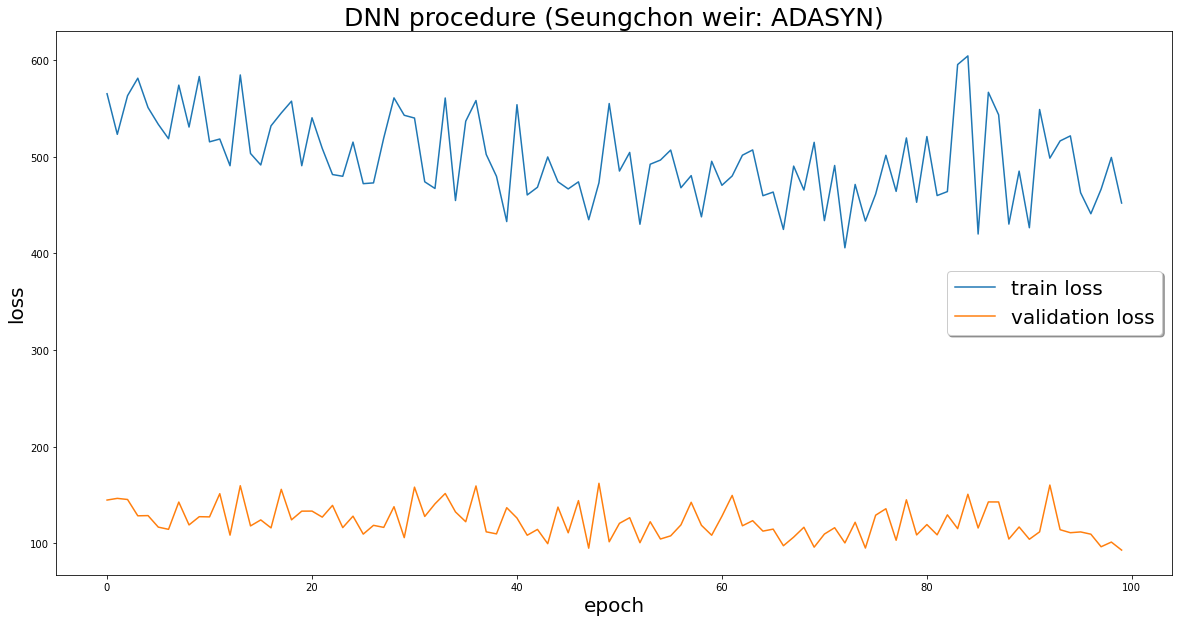

In [97]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_ADASYN_python.png')

In [98]:
# SMOTE-ENN
hist = model.fit(
    SC_train_x_sme, SC_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 342.3318 - mean_squared_error: 342.3318 - mean_absolute_error: 11.3238 - val_loss: 174.9769 - val_mean_squared_error: 174.9769 - val_mean_absolute_error: 10.2857 - 43ms/epoch - 5ms/step
Epoch 2/100
8/8 - 0s - loss: 392.0168 - mean_squared_error: 392.0168 - mean_absolute_error: 11.3004 - val_loss: 173.6378 - val_mean_squared_error: 173.6378 - val_mean_absolute_error: 10.3055 - 20ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 244.2485 - mean_squared_error: 244.2485 - mean_absolute_error: 8.9837 - val_loss: 187.3391 - val_mean_squared_error: 187.3391 - val_mean_absolute_error: 10.2763 - 21ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 347.8999 - mean_squared_error: 347.8999 - mean_absolute_error: 11.6464 - val_loss: 211.9071 - val_mean_squared_error: 211.9071 - val_mean_absolute_error: 11.4542 - 20ms/epoch - 2ms/step
Epoch 5/100
8/8 - 0s - loss: 337.4359 - mean_squared_error: 337.4359 - mean_absolute_error: 10.6063 - val_loss: 201.4886 - val_mean_squared_e

Epoch 40/100
8/8 - 0s - loss: 266.2018 - mean_squared_error: 266.2018 - mean_absolute_error: 9.4483 - val_loss: 223.1608 - val_mean_squared_error: 223.1608 - val_mean_absolute_error: 11.3932 - 20ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 270.3736 - mean_squared_error: 270.3737 - mean_absolute_error: 9.3923 - val_loss: 218.0249 - val_mean_squared_error: 218.0249 - val_mean_absolute_error: 11.3520 - 21ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 222.7773 - mean_squared_error: 222.7773 - mean_absolute_error: 9.1060 - val_loss: 185.9881 - val_mean_squared_error: 185.9881 - val_mean_absolute_error: 10.6661 - 20ms/epoch - 2ms/step
Epoch 43/100
8/8 - 0s - loss: 250.0014 - mean_squared_error: 250.0014 - mean_absolute_error: 9.2128 - val_loss: 201.3766 - val_mean_squared_error: 201.3766 - val_mean_absolute_error: 10.8940 - 20ms/epoch - 3ms/step
Epoch 44/100
8/8 - 0s - loss: 240.8975 - mean_squared_error: 240.8975 - mean_absolute_error: 9.0451 - val_loss: 242.4489 - val_mean_squared_

Epoch 79/100
8/8 - 0s - loss: 216.5945 - mean_squared_error: 216.5945 - mean_absolute_error: 8.5452 - val_loss: 220.9228 - val_mean_squared_error: 220.9228 - val_mean_absolute_error: 11.4003 - 22ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 279.6209 - mean_squared_error: 279.6209 - mean_absolute_error: 10.6313 - val_loss: 212.0000 - val_mean_squared_error: 212.0000 - val_mean_absolute_error: 11.2056 - 22ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 251.7586 - mean_squared_error: 251.7586 - mean_absolute_error: 9.4232 - val_loss: 206.9240 - val_mean_squared_error: 206.9240 - val_mean_absolute_error: 11.0682 - 21ms/epoch - 3ms/step
Epoch 82/100
8/8 - 0s - loss: 297.0638 - mean_squared_error: 297.0638 - mean_absolute_error: 10.1076 - val_loss: 215.2843 - val_mean_squared_error: 215.2843 - val_mean_absolute_error: 11.1877 - 21ms/epoch - 3ms/step
Epoch 83/100
8/8 - 0s - loss: 262.7449 - mean_squared_error: 262.7449 - mean_absolute_error: 10.2762 - val_loss: 209.3482 - val_mean_squar

In [99]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 750.4753 - mean_squared_error: 750.4753 - mean_absolute_error: 21.8184
test_loss:  750.475341796875
test_mae:  750.475341796875


In [100]:
SC_test_y_pred_DNN_sme = model.predict(SC_test_x)
SC_test_y_pred_DNN_sme

2/2 [==============================] - 0s 1000us/step


array([[ 52.12159  ],
       [ 63.023205 ],
       [ 59.71617  ],
       [ 61.310013 ],
       [ 82.60774  ],
       [ 67.11653  ],
       [ 70.86556  ],
       [ 78.82048  ],
       [ 34.637085 ],
       [ 67.835785 ],
       [ 70.338776 ],
       [ 92.42421  ],
       [ 34.448063 ],
       [ 88.26899  ],
       [ 57.533237 ],
       [ 38.21692  ],
       [107.408    ],
       [ 75.009056 ],
       [ 49.466415 ],
       [ 34.48652  ],
       [ 20.827753 ],
       [ 11.290978 ],
       [  0.9073789],
       [  0.9073789],
       [114.43268  ],
       [ 77.23656  ],
       [113.987625 ],
       [ 69.027565 ],
       [ 15.049007 ],
       [ 44.850727 ],
       [ 83.17738  ],
       [  8.139029 ],
       [ 16.848564 ],
       [ 39.39692  ],
       [ 71.25557  ],
       [ 78.6326   ],
       [ 83.50555  ],
       [ 85.6615   ],
       [ 57.841896 ],
       [ 75.17216  ],
       [ 23.50851  ],
       [ 59.706146 ]], dtype=float32)

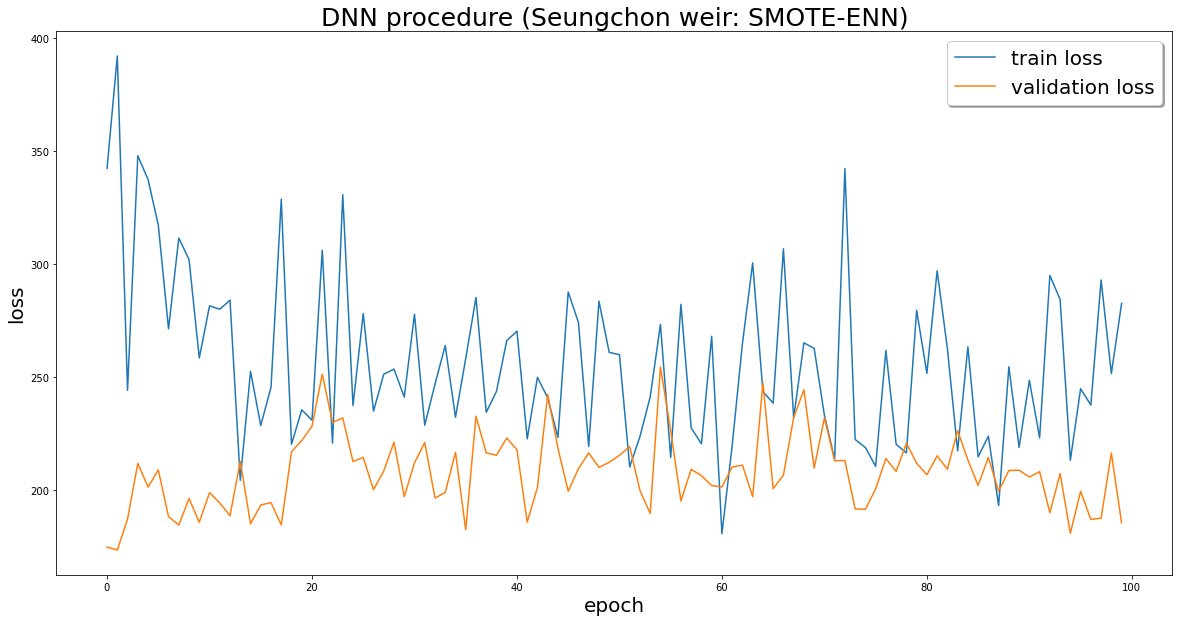

In [101]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE-ENN_python.png')

In [102]:
# SMOTE-Tomek
hist = model.fit(
    SC_train_x_smt, SC_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 501.5359 - mean_squared_error: 501.5359 - mean_absolute_error: 15.0365 - val_loss: 85.6585 - val_mean_squared_error: 85.6585 - val_mean_absolute_error: 6.2394 - 47ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 489.6750 - mean_squared_error: 489.6750 - mean_absolute_error: 15.5892 - val_loss: 72.9853 - val_mean_squared_error: 72.9853 - val_mean_absolute_error: 6.1891 - 24ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 406.7477 - mean_squared_error: 406.7477 - mean_absolute_error: 13.6992 - val_loss: 88.6427 - val_mean_squared_error: 88.6427 - val_mean_absolute_error: 6.8215 - 24ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 449.2282 - mean_squared_error: 449.2282 - mean_absolute_error: 14.0553 - val_loss: 92.3232 - val_mean_squared_error: 92.3232 - val_mean_absolute_error: 7.0791 - 25ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 472.9545 - mean_squared_error: 472.9545 - mean_absolute_error: 15.0286 - val_loss: 79.3407 - val_mean_squared_err

Epoch 40/100
14/14 - 0s - loss: 424.8804 - mean_squared_error: 424.8804 - mean_absolute_error: 13.8430 - val_loss: 87.2880 - val_mean_squared_error: 87.2880 - val_mean_absolute_error: 6.7156 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 432.4053 - mean_squared_error: 432.4053 - mean_absolute_error: 14.6953 - val_loss: 81.3588 - val_mean_squared_error: 81.3588 - val_mean_absolute_error: 6.8226 - 23ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 395.8917 - mean_squared_error: 395.8917 - mean_absolute_error: 14.1482 - val_loss: 72.3138 - val_mean_squared_error: 72.3138 - val_mean_absolute_error: 6.1690 - 22ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 356.5818 - mean_squared_error: 356.5818 - mean_absolute_error: 13.2250 - val_loss: 68.1832 - val_mean_squared_error: 68.1832 - val_mean_absolute_error: 5.8289 - 25ms/epoch - 2ms/step
Epoch 44/100
14/14 - 0s - loss: 379.7974 - mean_squared_error: 379.7974 - mean_absolute_error: 13.2405 - val_loss: 78.3245 - val_mean_square

14/14 - 0s - loss: 381.6211 - mean_squared_error: 381.6211 - mean_absolute_error: 13.5565 - val_loss: 70.7693 - val_mean_squared_error: 70.7693 - val_mean_absolute_error: 6.0080 - 23ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 443.9798 - mean_squared_error: 443.9798 - mean_absolute_error: 14.4751 - val_loss: 74.1582 - val_mean_squared_error: 74.1582 - val_mean_absolute_error: 5.7983 - 25ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 357.3922 - mean_squared_error: 357.3922 - mean_absolute_error: 12.6997 - val_loss: 96.7705 - val_mean_squared_error: 96.7705 - val_mean_absolute_error: 7.1378 - 23ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 344.9062 - mean_squared_error: 344.9062 - mean_absolute_error: 13.1659 - val_loss: 82.6091 - val_mean_squared_error: 82.6091 - val_mean_absolute_error: 7.0859 - 23ms/epoch - 2ms/step
Epoch 82/100
14/14 - 0s - loss: 386.8449 - mean_squared_error: 386.8449 - mean_absolute_error: 13.7177 - val_loss: 78.9710 - val_mean_squared_error: 78.9

In [103]:
scores = model.evaluate(SC_test_x, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 335.4054 - mean_squared_error: 335.4054 - mean_absolute_error: 13.6247
test_loss:  335.4054260253906
test_mae:  335.4054260253906


In [104]:
SC_test_y_pred_DNN_smt = model.predict(SC_test_x)
SC_test_y_pred_DNN_smt

2/2 [==============================] - 0s 1ms/step


array([[ 45.75114  ],
       [ 58.262062 ],
       [ 56.07148  ],
       [ 56.664978 ],
       [ 74.94091  ],
       [ 60.708397 ],
       [ 63.772404 ],
       [ 67.55686  ],
       [ 28.360552 ],
       [ 58.2213   ],
       [ 60.578568 ],
       [ 79.80928  ],
       [ 21.450844 ],
       [ 79.03981  ],
       [ 48.35193  ],
       [ 32.98075  ],
       [100.927475 ],
       [ 61.13585  ],
       [ 39.34343  ],
       [ 32.664764 ],
       [ 15.145708 ],
       [  7.5235496],
       [  4.458597 ],
       [  2.890261 ],
       [ 68.418655 ],
       [ 58.15494  ],
       [ 82.23419  ],
       [ 43.993977 ],
       [  5.7780337],
       [ 32.444504 ],
       [ 84.971176 ],
       [  6.534683 ],
       [ 14.255947 ],
       [ 28.654417 ],
       [ 64.57893  ],
       [ 71.12085  ],
       [ 75.01854  ],
       [ 75.35991  ],
       [ 27.360186 ],
       [ 67.90833  ],
       [ 20.877998 ],
       [ 53.892868 ]], dtype=float32)

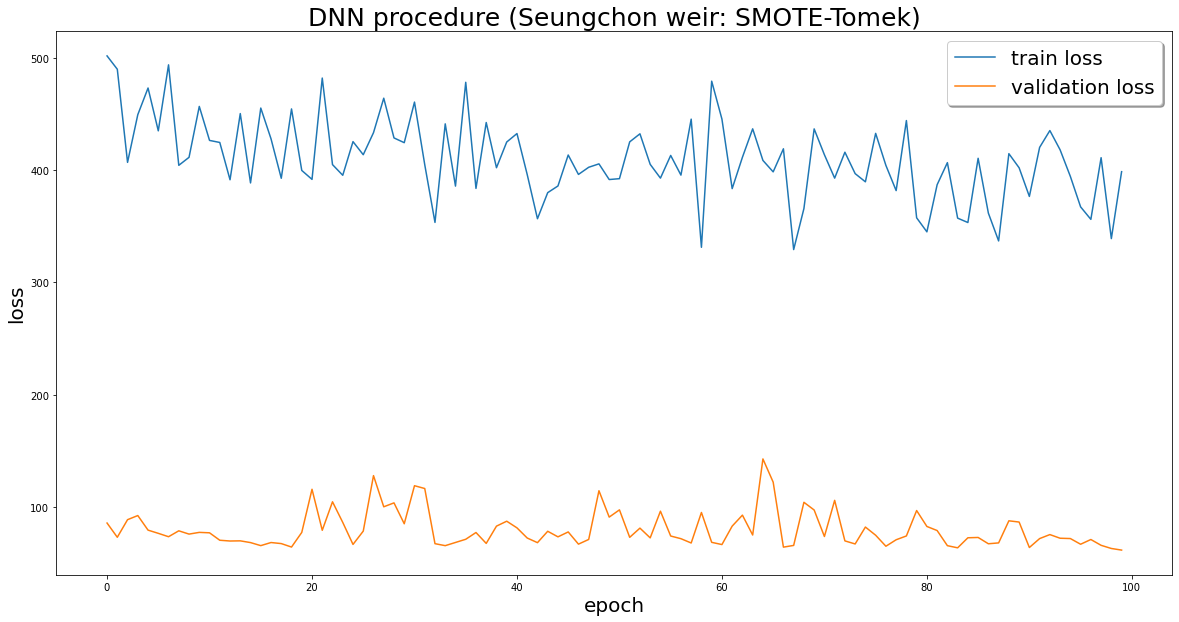

In [105]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Seungchon weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN SC_SMOTE-Tomek_python.png')

In [119]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [120]:
# CNN model (SC)
SC_train_x_CNN = SC_train_x.to_numpy().reshape(SC_train_x.shape[0], SC_train_x.shape[1], 1)
SC_train_x_sm_CNN = SC_train_x_sm.to_numpy().reshape(SC_train_x_sm.shape[0], SC_train_x_sm.shape[1], 1) # SMOTE
SC_train_x_ads_CNN = SC_train_x_ads.to_numpy().reshape(SC_train_x_ads.shape[0], SC_train_x_ads.shape[1], 1) # ADASYN
SC_train_x_sme_CNN = SC_train_x_sme.to_numpy().reshape(SC_train_x_sme.shape[0], SC_train_x_sme.shape[1], 1) # SMOTE-ENN
SC_train_x_smt_CNN = SC_train_x_smt.to_numpy().reshape(SC_train_x_smt.shape[0], SC_train_x_smt.shape[1], 1) # SMOTE-Tomek
SC_test_x_CNN = SC_test_x.to_numpy().reshape(SC_test_x.shape[0], SC_test_x.shape[1], 1) 

In [121]:
# model
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [122]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 17, 64)            192       
                                                                 
 conv1d_3 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten_1 (Flatten)         (None, 224)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                7200      
                                                      

In [123]:
# original
hist = model.fit(
    SC_train_x_CNN, SC_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 2092.6692 - mean_squared_error: 2092.6692 - mean_absolute_error: 33.5012 - val_loss: 1518.8728 - val_mean_squared_error: 1518.8728 - val_mean_absolute_error: 30.7580 - 472ms/epoch - 52ms/step
Epoch 2/100
9/9 - 0s - loss: 1714.9923 - mean_squared_error: 1714.9923 - mean_absolute_error: 29.9054 - val_loss: 1392.8629 - val_mean_squared_error: 1392.8629 - val_mean_absolute_error: 27.4732 - 33ms/epoch - 4ms/step
Epoch 3/100
9/9 - 0s - loss: 1597.4783 - mean_squared_error: 1597.4783 - mean_absolute_error: 27.4535 - val_loss: 1346.6919 - val_mean_squared_error: 1346.6919 - val_mean_absolute_error: 27.1043 - 27ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1540.7590 - mean_squared_error: 1540.7590 - mean_absolute_error: 28.3657 - val_loss: 1319.8572 - val_mean_squared_error: 1319.8572 - val_mean_absolute_error: 27.2199 - 28ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 1609.7341 - mean_squared_error: 1609.7341 - mean_absolute_error: 28.0637 - val_loss: 1310.000

Epoch 39/100
9/9 - 0s - loss: 1143.5967 - mean_squared_error: 1143.5967 - mean_absolute_error: 24.1487 - val_loss: 878.3196 - val_mean_squared_error: 878.3196 - val_mean_absolute_error: 22.9129 - 26ms/epoch - 3ms/step
Epoch 40/100
9/9 - 0s - loss: 1106.9194 - mean_squared_error: 1106.9194 - mean_absolute_error: 23.4054 - val_loss: 848.2660 - val_mean_squared_error: 848.2660 - val_mean_absolute_error: 22.6821 - 26ms/epoch - 3ms/step
Epoch 41/100
9/9 - 0s - loss: 1119.5486 - mean_squared_error: 1119.5486 - mean_absolute_error: 23.1718 - val_loss: 902.5658 - val_mean_squared_error: 902.5658 - val_mean_absolute_error: 23.8170 - 27ms/epoch - 3ms/step
Epoch 42/100
9/9 - 0s - loss: 1103.5336 - mean_squared_error: 1103.5336 - mean_absolute_error: 24.3112 - val_loss: 883.0260 - val_mean_squared_error: 883.0260 - val_mean_absolute_error: 22.4505 - 27ms/epoch - 3ms/step
Epoch 43/100
9/9 - 0s - loss: 1131.3113 - mean_squared_error: 1131.3113 - mean_absolute_error: 23.6458 - val_loss: 848.5401 - va

Epoch 77/100
9/9 - 0s - loss: 819.8779 - mean_squared_error: 819.8779 - mean_absolute_error: 21.7855 - val_loss: 1037.3032 - val_mean_squared_error: 1037.3032 - val_mean_absolute_error: 23.6429 - 28ms/epoch - 3ms/step
Epoch 78/100
9/9 - 0s - loss: 859.8538 - mean_squared_error: 859.8538 - mean_absolute_error: 21.1045 - val_loss: 840.8380 - val_mean_squared_error: 840.8380 - val_mean_absolute_error: 22.4066 - 28ms/epoch - 3ms/step
Epoch 79/100
9/9 - 0s - loss: 799.0526 - mean_squared_error: 799.0526 - mean_absolute_error: 20.8756 - val_loss: 877.8604 - val_mean_squared_error: 877.8604 - val_mean_absolute_error: 21.8268 - 29ms/epoch - 3ms/step
Epoch 80/100
9/9 - 0s - loss: 844.2569 - mean_squared_error: 844.2569 - mean_absolute_error: 21.5808 - val_loss: 793.6783 - val_mean_squared_error: 793.6783 - val_mean_absolute_error: 22.0690 - 28ms/epoch - 3ms/step
Epoch 81/100
9/9 - 0s - loss: 793.5764 - mean_squared_error: 793.5764 - mean_absolute_error: 20.7238 - val_loss: 778.6744 - val_mean_s

In [124]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 460.0256 - mean_squared_error: 460.0256 - mean_absolute_error: 15.9835
test_loss:  460.025634765625
test_mae:  460.025634765625


In [125]:
SC_test_y_pred_CNN = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN

2/2 [==============================] - 0s 996us/step


array([[46.18035  ],
       [83.370575 ],
       [49.578472 ],
       [48.42972  ],
       [78.84224  ],
       [53.42895  ],
       [55.104847 ],
       [53.085735 ],
       [37.730724 ],
       [59.461502 ],
       [47.86392  ],
       [68.36275  ],
       [25.978916 ],
       [91.92655  ],
       [59.356304 ],
       [13.937339 ],
       [90.58005  ],
       [73.87442  ],
       [55.843708 ],
       [10.084796 ],
       [14.442065 ],
       [11.681264 ],
       [ 7.495123 ],
       [ 5.711547 ],
       [91.179756 ],
       [22.293884 ],
       [67.035706 ],
       [53.042988 ],
       [12.070643 ],
       [26.419846 ],
       [74.14119  ],
       [ 7.9130716],
       [12.642356 ],
       [30.22192  ],
       [64.65018  ],
       [85.312195 ],
       [87.18387  ],
       [85.11919  ],
       [27.252274 ],
       [72.6174   ],
       [25.940598 ],
       [45.94576  ]], dtype=float32)

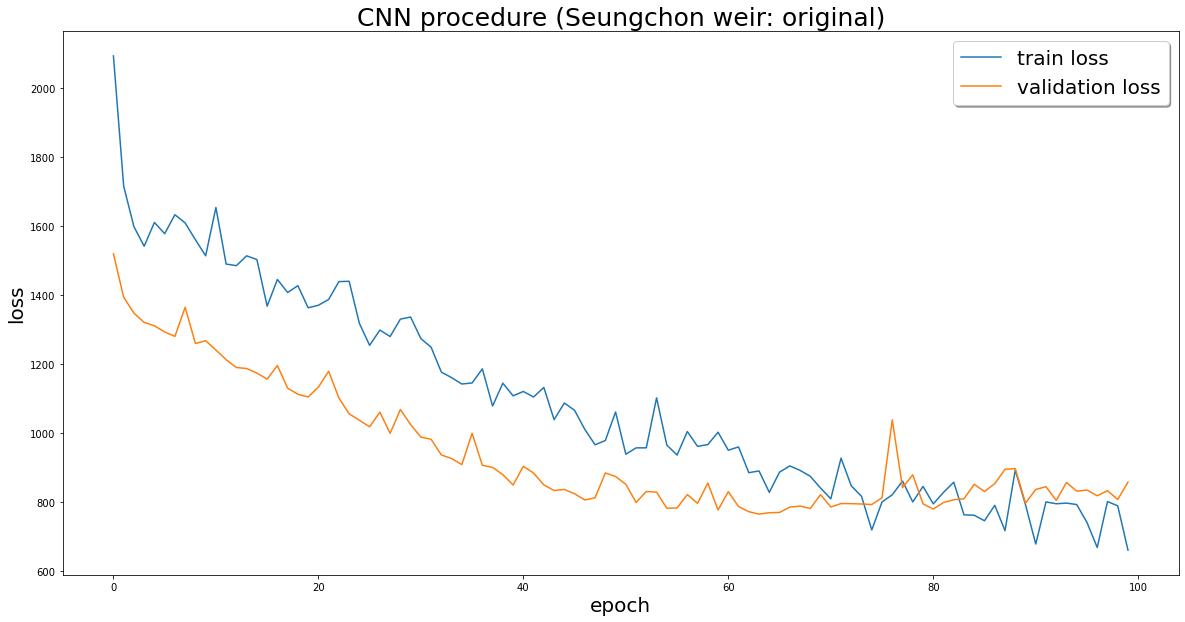

In [126]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_python.png')

In [127]:
# SMOTE
hist = model.fit(
    SC_train_x_sm_CNN, SC_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
15/15 - 0s - loss: 689.9957 - mean_squared_error: 689.9957 - mean_absolute_error: 19.0754 - val_loss: 108.3865 - val_mean_squared_error: 108.3865 - val_mean_absolute_error: 7.8425 - 53ms/epoch - 4ms/step
Epoch 2/100
15/15 - 0s - loss: 640.0077 - mean_squared_error: 640.0077 - mean_absolute_error: 18.2275 - val_loss: 102.3934 - val_mean_squared_error: 102.3934 - val_mean_absolute_error: 7.6260 - 36ms/epoch - 2ms/step
Epoch 3/100
15/15 - 0s - loss: 628.7811 - mean_squared_error: 628.7811 - mean_absolute_error: 18.0330 - val_loss: 94.7617 - val_mean_squared_error: 94.7617 - val_mean_absolute_error: 7.2175 - 34ms/epoch - 2ms/step
Epoch 4/100
15/15 - 0s - loss: 727.7440 - mean_squared_error: 727.7440 - mean_absolute_error: 18.4412 - val_loss: 92.7442 - val_mean_squared_error: 92.7442 - val_mean_absolute_error: 7.3711 - 35ms/epoch - 2ms/step
Epoch 5/100
15/15 - 0s - loss: 640.8712 - mean_squared_error: 640.8712 - mean_absolute_error: 17.8903 - val_loss: 110.1064 - val_mean_square

Epoch 39/100
15/15 - 0s - loss: 596.6974 - mean_squared_error: 596.6974 - mean_absolute_error: 17.1680 - val_loss: 92.4033 - val_mean_squared_error: 92.4033 - val_mean_absolute_error: 7.3565 - 33ms/epoch - 2ms/step
Epoch 40/100
15/15 - 0s - loss: 595.7576 - mean_squared_error: 595.7576 - mean_absolute_error: 17.0889 - val_loss: 96.6935 - val_mean_squared_error: 96.6935 - val_mean_absolute_error: 7.4164 - 34ms/epoch - 2ms/step
Epoch 41/100
15/15 - 0s - loss: 605.0353 - mean_squared_error: 605.0353 - mean_absolute_error: 17.1342 - val_loss: 109.4299 - val_mean_squared_error: 109.4299 - val_mean_absolute_error: 8.1260 - 34ms/epoch - 2ms/step
Epoch 42/100
15/15 - 0s - loss: 625.7212 - mean_squared_error: 625.7212 - mean_absolute_error: 17.5032 - val_loss: 93.4084 - val_mean_squared_error: 93.4084 - val_mean_absolute_error: 7.3576 - 36ms/epoch - 2ms/step
Epoch 43/100
15/15 - 0s - loss: 626.5344 - mean_squared_error: 626.5344 - mean_absolute_error: 17.1335 - val_loss: 123.7441 - val_mean_squ

Epoch 77/100
15/15 - 0s - loss: 534.9678 - mean_squared_error: 534.9678 - mean_absolute_error: 16.3826 - val_loss: 107.4282 - val_mean_squared_error: 107.4282 - val_mean_absolute_error: 8.1060 - 33ms/epoch - 2ms/step
Epoch 78/100
15/15 - 0s - loss: 616.4341 - mean_squared_error: 616.4341 - mean_absolute_error: 17.1931 - val_loss: 112.3210 - val_mean_squared_error: 112.3210 - val_mean_absolute_error: 8.2493 - 35ms/epoch - 2ms/step
Epoch 79/100
15/15 - 0s - loss: 614.6935 - mean_squared_error: 614.6935 - mean_absolute_error: 17.7966 - val_loss: 113.2200 - val_mean_squared_error: 113.2200 - val_mean_absolute_error: 7.8719 - 35ms/epoch - 2ms/step
Epoch 80/100
15/15 - 0s - loss: 637.2934 - mean_squared_error: 637.2934 - mean_absolute_error: 17.6876 - val_loss: 111.7047 - val_mean_squared_error: 111.7047 - val_mean_absolute_error: 7.8230 - 34ms/epoch - 2ms/step
Epoch 81/100
15/15 - 0s - loss: 552.2263 - mean_squared_error: 552.2263 - mean_absolute_error: 16.6719 - val_loss: 99.6970 - val_mea

In [128]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 3ms/step - loss: 260.9460 - mean_squared_error: 260.9460 - mean_absolute_error: 12.5685
test_loss:  260.9459533691406
test_mae:  260.9459533691406


In [129]:
SC_test_y_pred_CNN_sm = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_sm

2/2 [==============================] - 0s 997us/step


array([[46.153137 ],
       [77.97445  ],
       [56.566296 ],
       [54.585503 ],
       [87.86603  ],
       [56.054726 ],
       [62.120644 ],
       [60.89781  ],
       [36.762634 ],
       [61.44518  ],
       [52.331367 ],
       [77.85399  ],
       [24.007488 ],
       [76.325745 ],
       [55.41856  ],
       [15.741504 ],
       [82.33155  ],
       [60.411186 ],
       [49.120216 ],
       [14.42785  ],
       [12.137355 ],
       [ 9.680394 ],
       [ 2.4843988],
       [ 3.970471 ],
       [69.89646  ],
       [25.788456 ],
       [48.58651  ],
       [39.951767 ],
       [12.428354 ],
       [22.44931  ],
       [56.34675  ],
       [ 7.170983 ],
       [ 8.888996 ],
       [22.573912 ],
       [53.13906  ],
       [73.86941  ],
       [78.735054 ],
       [76.269936 ],
       [32.371735 ],
       [61.130516 ],
       [23.243156 ],
       [43.994225 ]], dtype=float32)

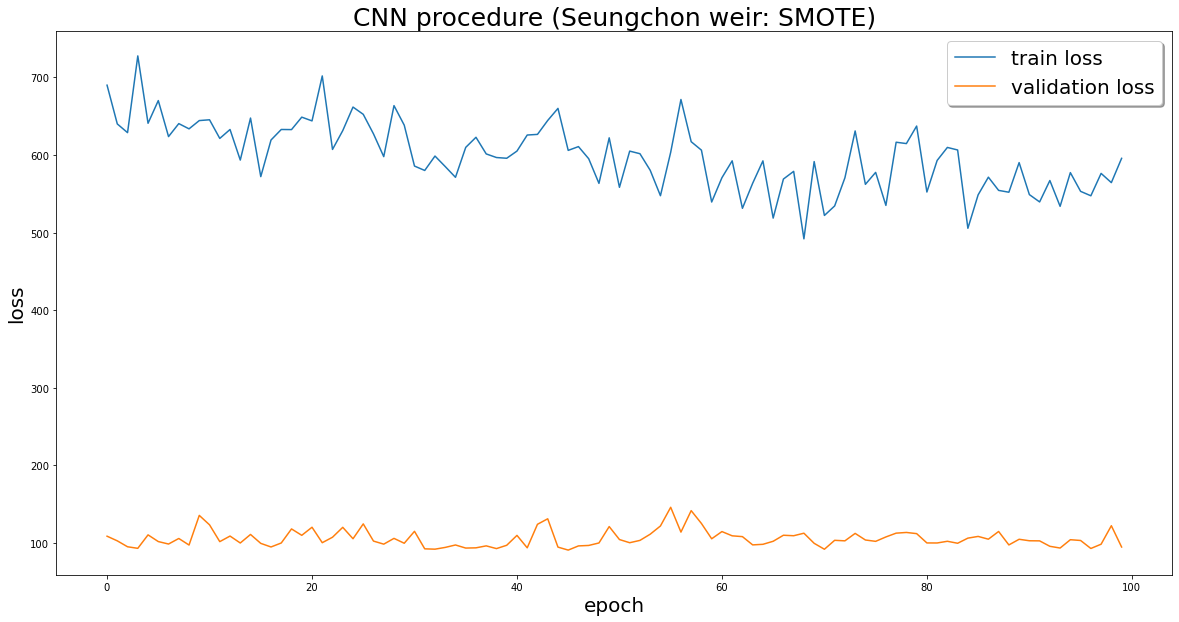

In [130]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_python.png')

In [131]:
# ADASYN
hist = model.fit(
    SC_train_x_ads_CNN, SC_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 622.2382 - mean_squared_error: 622.2382 - mean_absolute_error: 17.2561 - val_loss: 128.0649 - val_mean_squared_error: 128.0649 - val_mean_absolute_error: 8.4287 - 52ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 593.3232 - mean_squared_error: 593.3232 - mean_absolute_error: 17.7092 - val_loss: 134.0447 - val_mean_squared_error: 134.0447 - val_mean_absolute_error: 7.7030 - 37ms/epoch - 3ms/step
Epoch 3/100
14/14 - 0s - loss: 534.2964 - mean_squared_error: 534.2964 - mean_absolute_error: 17.5215 - val_loss: 126.9480 - val_mean_squared_error: 126.9480 - val_mean_absolute_error: 7.4762 - 34ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 576.1586 - mean_squared_error: 576.1586 - mean_absolute_error: 17.2790 - val_loss: 104.6410 - val_mean_squared_error: 104.6410 - val_mean_absolute_error: 7.0839 - 33ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 588.4554 - mean_squared_error: 588.4554 - mean_absolute_error: 17.4487 - val_loss: 120.3197 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 519.9888 - mean_squared_error: 519.9888 - mean_absolute_error: 16.7546 - val_loss: 134.3081 - val_mean_squared_error: 134.3081 - val_mean_absolute_error: 9.1684 - 33ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 609.3923 - mean_squared_error: 609.3923 - mean_absolute_error: 17.5932 - val_loss: 114.1950 - val_mean_squared_error: 114.1950 - val_mean_absolute_error: 8.2729 - 33ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 545.1737 - mean_squared_error: 545.1737 - mean_absolute_error: 16.7733 - val_loss: 129.4901 - val_mean_squared_error: 129.4901 - val_mean_absolute_error: 7.8254 - 34ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 531.3318 - mean_squared_error: 531.3318 - mean_absolute_error: 16.9356 - val_loss: 120.4420 - val_mean_squared_error: 120.4420 - val_mean_absolute_error: 8.2870 - 34ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 498.9795 - mean_squared_error: 498.9795 - mean_absolute_error: 16.3157 - val_loss: 131.7521 - val_me

Epoch 77/100
14/14 - 0s - loss: 544.4667 - mean_squared_error: 544.4667 - mean_absolute_error: 16.7292 - val_loss: 133.7824 - val_mean_squared_error: 133.7824 - val_mean_absolute_error: 8.0070 - 33ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 527.1408 - mean_squared_error: 527.1408 - mean_absolute_error: 16.7196 - val_loss: 125.3817 - val_mean_squared_error: 125.3817 - val_mean_absolute_error: 8.1566 - 33ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 500.1202 - mean_squared_error: 500.1202 - mean_absolute_error: 16.3727 - val_loss: 117.9997 - val_mean_squared_error: 117.9997 - val_mean_absolute_error: 8.3034 - 32ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 483.1441 - mean_squared_error: 483.1441 - mean_absolute_error: 16.3241 - val_loss: 103.9593 - val_mean_squared_error: 103.9593 - val_mean_absolute_error: 7.0994 - 34ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 510.1412 - mean_squared_error: 510.1412 - mean_absolute_error: 15.9078 - val_loss: 120.4114 - val_me

In [132]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 1ms/step - loss: 227.8235 - mean_squared_error: 227.8235 - mean_absolute_error: 12.0770
test_loss:  227.82347106933594
test_mae:  227.82347106933594


In [133]:
SC_test_y_pred_CNN_ads = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_ads

2/2 [==============================] - 0s 1000us/step


array([[45.133533 ],
       [72.1673   ],
       [55.97888  ],
       [54.138924 ],
       [82.42093  ],
       [55.314842 ],
       [60.634636 ],
       [58.602264 ],
       [31.64563  ],
       [56.58469  ],
       [50.39026  ],
       [72.98087  ],
       [23.431295 ],
       [72.26712  ],
       [48.745995 ],
       [17.766798 ],
       [76.132935 ],
       [55.071724 ],
       [46.357773 ],
       [20.717329 ],
       [11.88679  ],
       [ 9.762876 ],
       [ 1.7658193],
       [ 3.3518877],
       [79.341896 ],
       [29.608507 ],
       [45.51848  ],
       [37.74415  ],
       [14.403605 ],
       [24.70704  ],
       [51.100147 ],
       [ 6.676529 ],
       [ 8.550196 ],
       [23.22287  ],
       [49.481888 ],
       [69.38547  ],
       [75.15228  ],
       [73.17314  ],
       [33.55664  ],
       [56.391434 ],
       [19.171743 ],
       [40.960587 ]], dtype=float32)

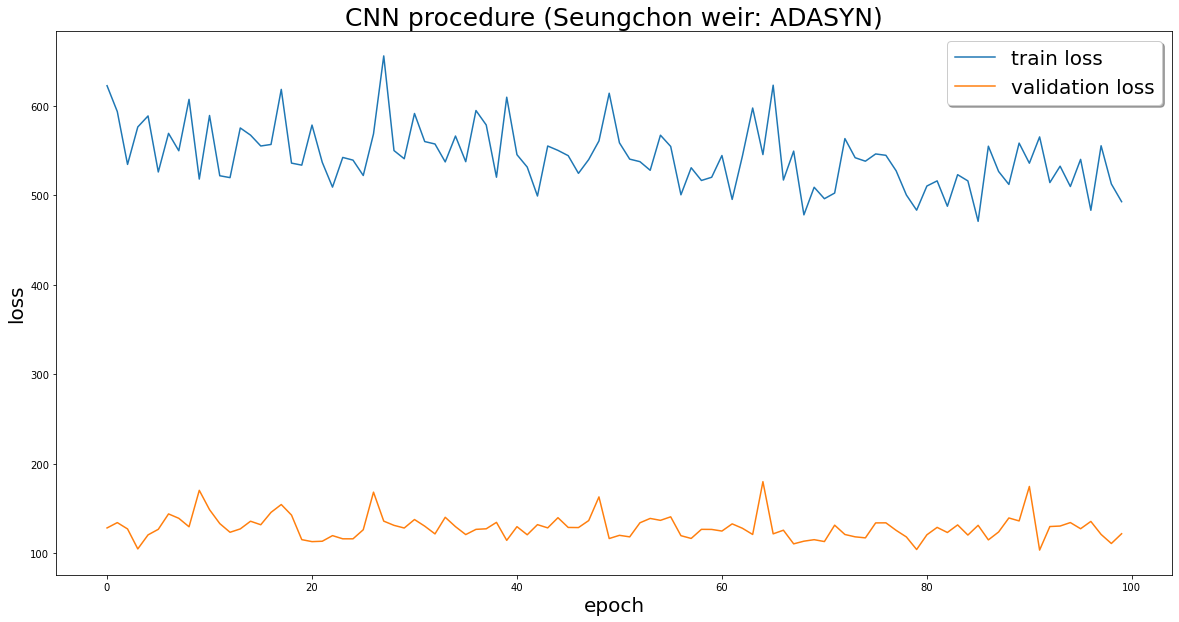

In [134]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_ADASYN_python.png')

In [135]:
# SMOTE-ENN
hist = model.fit(
    SC_train_x_sme_CNN, SC_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
8/8 - 0s - loss: 337.2816 - mean_squared_error: 337.2816 - mean_absolute_error: 12.6262 - val_loss: 207.7241 - val_mean_squared_error: 207.7241 - val_mean_absolute_error: 11.5879 - 45ms/epoch - 6ms/step
Epoch 2/100
8/8 - 0s - loss: 387.9200 - mean_squared_error: 387.9200 - mean_absolute_error: 12.7434 - val_loss: 232.8697 - val_mean_squared_error: 232.8697 - val_mean_absolute_error: 12.0887 - 26ms/epoch - 3ms/step
Epoch 3/100
8/8 - 0s - loss: 386.0707 - mean_squared_error: 386.0707 - mean_absolute_error: 11.6741 - val_loss: 316.0115 - val_mean_squared_error: 316.0115 - val_mean_absolute_error: 14.0279 - 26ms/epoch - 3ms/step
Epoch 4/100
8/8 - 0s - loss: 397.8266 - mean_squared_error: 397.8266 - mean_absolute_error: 12.3972 - val_loss: 262.3465 - val_mean_squared_error: 262.3465 - val_mean_absolute_error: 12.7301 - 25ms/epoch - 3ms/step
Epoch 5/100
8/8 - 0s - loss: 334.9833 - mean_squared_error: 334.9833 - mean_absolute_error: 11.2573 - val_loss: 292.7606 - val_mean_squared_

Epoch 39/100
8/8 - 0s - loss: 365.7125 - mean_squared_error: 365.7125 - mean_absolute_error: 11.3841 - val_loss: 305.6108 - val_mean_squared_error: 305.6108 - val_mean_absolute_error: 13.5536 - 25ms/epoch - 3ms/step
Epoch 40/100
8/8 - 0s - loss: 362.0724 - mean_squared_error: 362.0724 - mean_absolute_error: 11.8573 - val_loss: 236.7135 - val_mean_squared_error: 236.7135 - val_mean_absolute_error: 12.0573 - 25ms/epoch - 3ms/step
Epoch 41/100
8/8 - 0s - loss: 280.8268 - mean_squared_error: 280.8268 - mean_absolute_error: 10.0956 - val_loss: 343.2379 - val_mean_squared_error: 343.2379 - val_mean_absolute_error: 14.7938 - 26ms/epoch - 3ms/step
Epoch 42/100
8/8 - 0s - loss: 336.6879 - mean_squared_error: 336.6879 - mean_absolute_error: 10.7895 - val_loss: 226.4761 - val_mean_squared_error: 226.4761 - val_mean_absolute_error: 11.8756 - 25ms/epoch - 3ms/step
Epoch 43/100
8/8 - 0s - loss: 307.2404 - mean_squared_error: 307.2404 - mean_absolute_error: 11.4191 - val_loss: 272.4319 - val_mean_squ

Epoch 77/100
8/8 - 0s - loss: 377.3261 - mean_squared_error: 377.3261 - mean_absolute_error: 11.5703 - val_loss: 221.3616 - val_mean_squared_error: 221.3616 - val_mean_absolute_error: 11.7950 - 26ms/epoch - 3ms/step
Epoch 78/100
8/8 - 0s - loss: 280.8016 - mean_squared_error: 280.8016 - mean_absolute_error: 10.1784 - val_loss: 210.3828 - val_mean_squared_error: 210.3828 - val_mean_absolute_error: 11.5147 - 25ms/epoch - 3ms/step
Epoch 79/100
8/8 - 0s - loss: 270.6726 - mean_squared_error: 270.6726 - mean_absolute_error: 10.1715 - val_loss: 326.2022 - val_mean_squared_error: 326.2022 - val_mean_absolute_error: 14.3049 - 25ms/epoch - 3ms/step
Epoch 80/100
8/8 - 0s - loss: 365.2530 - mean_squared_error: 365.2530 - mean_absolute_error: 11.2499 - val_loss: 207.6963 - val_mean_squared_error: 207.6963 - val_mean_absolute_error: 11.5698 - 25ms/epoch - 3ms/step
Epoch 81/100
8/8 - 0s - loss: 351.4166 - mean_squared_error: 351.4166 - mean_absolute_error: 10.9937 - val_loss: 269.3514 - val_mean_squ

In [136]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 324.2625 - mean_squared_error: 324.2625 - mean_absolute_error: 14.0667
test_loss:  324.2625427246094
test_mae:  324.2625427246094


In [137]:
SC_test_y_pred_CNN_sme = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_sme

2/2 [==============================] - 0s 996us/step


array([[47.410423 ],
       [68.18274  ],
       [61.30072  ],
       [61.010597 ],
       [87.93657  ],
       [61.10514  ],
       [67.36841  ],
       [72.17923  ],
       [34.757988 ],
       [65.94291  ],
       [61.073547 ],
       [94.98889  ],
       [23.394918 ],
       [82.68665  ],
       [58.576324 ],
       [22.223948 ],
       [87.13211  ],
       [68.03952  ],
       [52.197906 ],
       [29.16524  ],
       [ 7.351268 ],
       [ 5.5067677],
       [ 1.6969554],
       [ 1.528355 ],
       [74.227036 ],
       [30.966932 ],
       [37.458904 ],
       [27.285326 ],
       [10.039802 ],
       [16.184084 ],
       [49.287254 ],
       [ 4.235874 ],
       [ 5.381075 ],
       [19.396393 ],
       [64.229774 ],
       [74.39908  ],
       [80.57223  ],
       [83.25432  ],
       [39.130016 ],
       [58.123928 ],
       [21.58398  ],
       [52.11691  ]], dtype=float32)

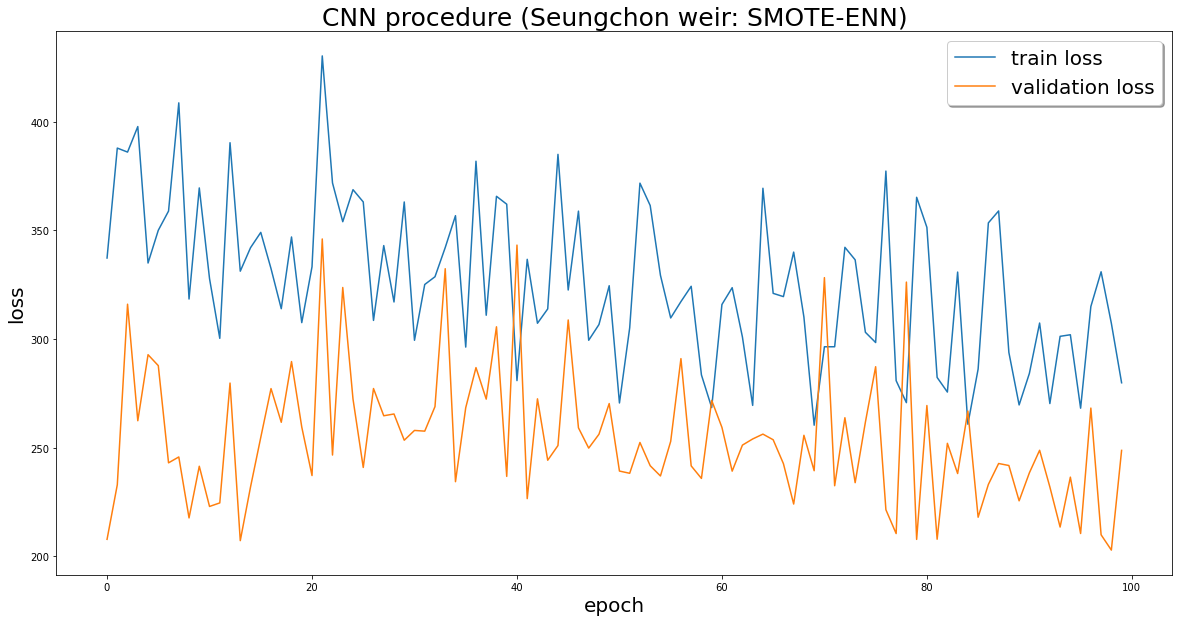

In [138]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_ENN_python.png')

In [139]:
# SMOTE-Tomek
hist = model.fit(
    SC_train_x_smt_CNN, SC_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 556.9972 - mean_squared_error: 556.9972 - mean_absolute_error: 15.7610 - val_loss: 102.6832 - val_mean_squared_error: 102.6832 - val_mean_absolute_error: 7.4345 - 52ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 604.2880 - mean_squared_error: 604.2880 - mean_absolute_error: 16.9146 - val_loss: 185.6925 - val_mean_squared_error: 185.6925 - val_mean_absolute_error: 9.7022 - 38ms/epoch - 3ms/step
Epoch 3/100
14/14 - 0s - loss: 503.8633 - mean_squared_error: 503.8633 - mean_absolute_error: 16.2842 - val_loss: 116.2029 - val_mean_squared_error: 116.2029 - val_mean_absolute_error: 8.2414 - 37ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 488.8061 - mean_squared_error: 488.8061 - mean_absolute_error: 15.3833 - val_loss: 107.5835 - val_mean_squared_error: 107.5835 - val_mean_absolute_error: 7.7123 - 36ms/epoch - 3ms/step
Epoch 5/100
14/14 - 0s - loss: 557.2460 - mean_squared_error: 557.2460 - mean_absolute_error: 16.3222 - val_loss: 104.2103 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 480.0012 - mean_squared_error: 480.0012 - mean_absolute_error: 15.4102 - val_loss: 98.2015 - val_mean_squared_error: 98.2015 - val_mean_absolute_error: 7.1991 - 33ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 440.1414 - mean_squared_error: 440.1414 - mean_absolute_error: 14.6127 - val_loss: 99.7553 - val_mean_squared_error: 99.7553 - val_mean_absolute_error: 7.5263 - 33ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 456.5731 - mean_squared_error: 456.5731 - mean_absolute_error: 14.8798 - val_loss: 96.3802 - val_mean_squared_error: 96.3802 - val_mean_absolute_error: 7.1750 - 34ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 515.7695 - mean_squared_error: 515.7695 - mean_absolute_error: 15.4195 - val_loss: 124.8392 - val_mean_squared_error: 124.8392 - val_mean_absolute_error: 8.0612 - 31ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 485.0136 - mean_squared_error: 485.0136 - mean_absolute_error: 15.1464 - val_loss: 95.6786 - val_mean_squa

Epoch 77/100
14/14 - 0s - loss: 453.0317 - mean_squared_error: 453.0317 - mean_absolute_error: 14.8281 - val_loss: 101.5169 - val_mean_squared_error: 101.5169 - val_mean_absolute_error: 7.5922 - 34ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 445.2032 - mean_squared_error: 445.2032 - mean_absolute_error: 14.6089 - val_loss: 98.9347 - val_mean_squared_error: 98.9347 - val_mean_absolute_error: 7.4221 - 36ms/epoch - 3ms/step
Epoch 79/100
14/14 - 0s - loss: 439.6173 - mean_squared_error: 439.6173 - mean_absolute_error: 14.5478 - val_loss: 95.3699 - val_mean_squared_error: 95.3699 - val_mean_absolute_error: 7.2122 - 34ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 404.6515 - mean_squared_error: 404.6515 - mean_absolute_error: 14.4637 - val_loss: 90.8275 - val_mean_squared_error: 90.8275 - val_mean_absolute_error: 7.0483 - 33ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 444.9342 - mean_squared_error: 444.9342 - mean_absolute_error: 15.2184 - val_loss: 117.9809 - val_mean_squ

In [140]:
scores = model.evaluate(SC_test_x_CNN, SC_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 240.0045 - mean_squared_error: 240.0045 - mean_absolute_error: 12.0844
test_loss:  240.0044708251953
test_mae:  240.0044708251953


In [141]:
SC_test_y_pred_CNN_smt = model.predict(SC_test_x_CNN)
SC_test_y_pred_CNN_smt

2/2 [==============================] - 0s 2ms/step


array([[44.596615 ],
       [67.77407  ],
       [59.649754 ],
       [58.217594 ],
       [80.92252  ],
       [57.8663   ],
       [64.54835  ],
       [65.68599  ],
       [30.700605 ],
       [60.683327 ],
       [55.08363  ],
       [82.141335 ],
       [24.585508 ],
       [74.84696  ],
       [48.835728 ],
       [20.686945 ],
       [76.33436  ],
       [57.549065 ],
       [43.77274  ],
       [22.623556 ],
       [11.410755 ],
       [ 8.410351 ],
       [ 5.750609 ],
       [ 3.4684339],
       [75.553024 ],
       [30.570055 ],
       [39.869915 ],
       [32.627537 ],
       [12.809223 ],
       [21.422544 ],
       [48.30773  ],
       [ 6.0315843],
       [ 8.270729 ],
       [22.707481 ],
       [57.63382  ],
       [74.41078  ],
       [78.209885 ],
       [77.023705 ],
       [31.885122 ],
       [60.369877 ],
       [17.300877 ],
       [46.13624  ]], dtype=float32)

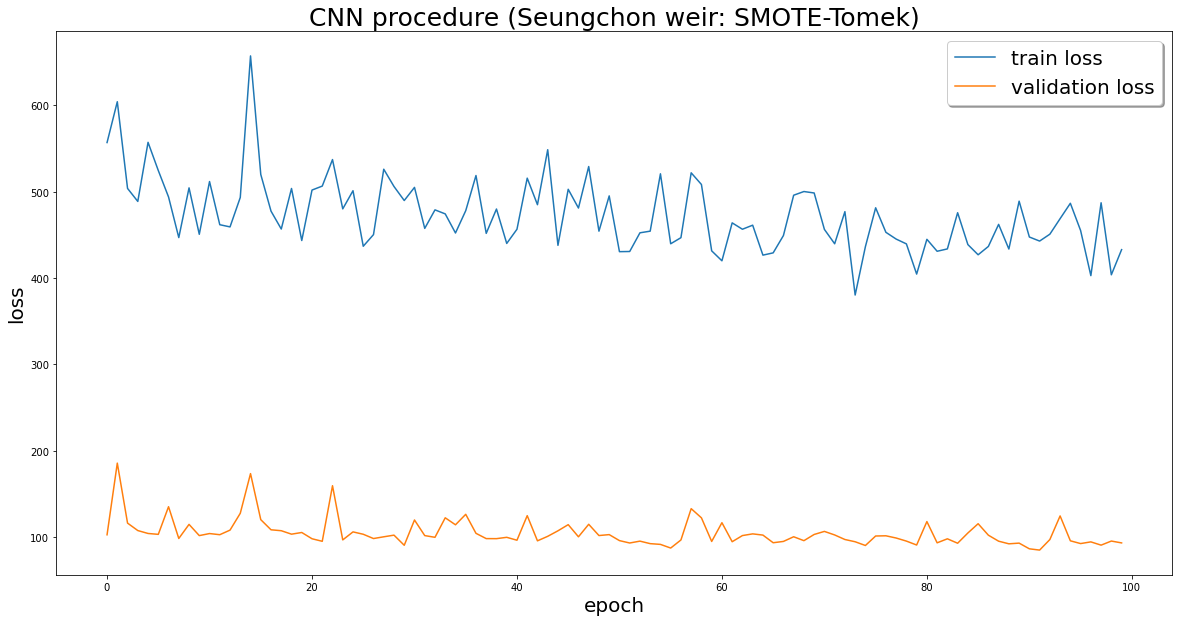

In [142]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Seungchon weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN SC_SMOTE_Tomek_python.png')

In [143]:
SC_test_y = np.array(SC_test_y, dtype=np.float32)

In [144]:
### write data
import pandas as pd

df_SC = pd.DataFrame([SC_test_y, SC_test_y_pred_DNN, SC_test_y_pred_DNN_sm, 
                      SC_test_y_pred_DNN_ads, SC_test_y_pred_DNN_sme, SC_test_y_pred_DNN_smt,
                      SC_test_y_pred_CNN, SC_test_y_pred_CNN_sm, 
                      SC_test_y_pred_CNN_ads, SC_test_y_pred_CNN_sme, SC_test_y_pred_CNN_smt]).T
df_SC.columns = ['Chla', 'DNN', 'DNN_SMOTE', 'DNN_ADASYN', 'DNN_SMOTE_ENN', 'DNN_SMOTE_Tomek',
                 'CNN', 'CNN_SMOTE', 'CNN_ADASYN', 'CNN_SMOTE_ENN', 'CNN_SMOTE_Tomek']
df_SC.to_csv('df_SC_res.csv', index=False, encoding='cp949') 

In [145]:
import tensorflow as tf

In [146]:
from tensorflow.keras import layers  #모듈(변수나 함수를 포함)만 불러오기
from sklearn.preprocessing import StandardScaler, MinMaxScaler  #표준 정규화, 최대-최소 정규화
from keras.layers import Dropout

In [147]:
## DNN model (JS)
# model
model = tf.keras.Sequential()  
model.add(layers.Dense(64, input_shape=(18,)))  
model.add(layers.Activation('relu'))  
model.add(layers.Dense(32))         
model.add(layers.Activation('relu'))
model.add(layers.Dense(16))         
model.add(layers.Activation('relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(1))
model.add(layers.Activation('linear')) 

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함. 

In [148]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                1216      
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                2080      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_10 (Dense)            (None, 16)                528       
                                                                 
 activation_6 (Activation)   (None, 16)                0         
                                                                 
 dropout_5 (Dropout)         (None, 16)               

In [149]:
# Original
hist = model.fit(
    JS_train_x, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 0s - loss: 3515.0498 - mean_squared_error: 3515.0498 - mean_absolute_error: 41.3920 - val_loss: 1070.9169 - val_mean_squared_error: 1070.9169 - val_mean_absolute_error: 27.0902 - 418ms/epoch - 46ms/step
Epoch 2/100
9/9 - 0s - loss: 2407.2761 - mean_squared_error: 2407.2761 - mean_absolute_error: 37.3392 - val_loss: 1257.4547 - val_mean_squared_error: 1257.4547 - val_mean_absolute_error: 29.6521 - 25ms/epoch - 3ms/step
Epoch 3/100
9/9 - 0s - loss: 2028.8408 - mean_squared_error: 2028.8408 - mean_absolute_error: 33.0969 - val_loss: 1033.2798 - val_mean_squared_error: 1033.2798 - val_mean_absolute_error: 25.7942 - 23ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 2110.7947 - mean_squared_error: 2110.7947 - mean_absolute_error: 33.1583 - val_loss: 1063.5581 - val_mean_squared_error: 1063.5581 - val_mean_absolute_error: 26.4308 - 22ms/epoch - 2ms/step
Epoch 5/100
9/9 - 0s - loss: 1990.3076 - mean_squared_error: 1990.3076 - mean_absolute_error: 32.0602 - val_loss: 1077.131

Epoch 39/100
9/9 - 0s - loss: 1204.9742 - mean_squared_error: 1204.9742 - mean_absolute_error: 23.5033 - val_loss: 593.5643 - val_mean_squared_error: 593.5643 - val_mean_absolute_error: 20.8891 - 22ms/epoch - 2ms/step
Epoch 40/100
9/9 - 0s - loss: 1126.8796 - mean_squared_error: 1126.8796 - mean_absolute_error: 22.5302 - val_loss: 732.0366 - val_mean_squared_error: 732.0366 - val_mean_absolute_error: 23.6288 - 21ms/epoch - 2ms/step
Epoch 41/100
9/9 - 0s - loss: 1043.3014 - mean_squared_error: 1043.3014 - mean_absolute_error: 21.4018 - val_loss: 517.2450 - val_mean_squared_error: 517.2450 - val_mean_absolute_error: 18.1394 - 21ms/epoch - 2ms/step
Epoch 42/100
9/9 - 0s - loss: 1141.9086 - mean_squared_error: 1141.9086 - mean_absolute_error: 22.2135 - val_loss: 534.6498 - val_mean_squared_error: 534.6498 - val_mean_absolute_error: 19.3320 - 21ms/epoch - 2ms/step
Epoch 43/100
9/9 - 0s - loss: 1096.9688 - mean_squared_error: 1096.9688 - mean_absolute_error: 21.8087 - val_loss: 531.2839 - va

Epoch 77/100
9/9 - 0s - loss: 932.1272 - mean_squared_error: 932.1272 - mean_absolute_error: 21.0829 - val_loss: 426.5822 - val_mean_squared_error: 426.5822 - val_mean_absolute_error: 15.6719 - 22ms/epoch - 2ms/step
Epoch 78/100
9/9 - 0s - loss: 1051.2205 - mean_squared_error: 1051.2205 - mean_absolute_error: 21.7005 - val_loss: 505.7838 - val_mean_squared_error: 505.7838 - val_mean_absolute_error: 18.8008 - 21ms/epoch - 2ms/step
Epoch 79/100
9/9 - 0s - loss: 1146.9200 - mean_squared_error: 1146.9200 - mean_absolute_error: 22.1555 - val_loss: 436.4406 - val_mean_squared_error: 436.4406 - val_mean_absolute_error: 15.8049 - 22ms/epoch - 2ms/step
Epoch 80/100
9/9 - 0s - loss: 888.7812 - mean_squared_error: 888.7812 - mean_absolute_error: 19.9860 - val_loss: 484.1836 - val_mean_squared_error: 484.1836 - val_mean_absolute_error: 18.1559 - 22ms/epoch - 2ms/step
Epoch 81/100
9/9 - 0s - loss: 1035.4551 - mean_squared_error: 1035.4551 - mean_absolute_error: 21.1955 - val_loss: 485.3251 - val_me

In [150]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 493.6254 - mean_squared_error: 493.6254 - mean_absolute_error: 15.7516
test_loss:  493.62542724609375
test_mae:  493.62542724609375


In [151]:
JS_test_y_pred_DNN = model.predict(JS_test_x)
JS_test_y_pred_DNN

2/2 [==============================] - 0s 1ms/step


array([[ 37.15336  ],
       [ 52.92005  ],
       [109.69796  ],
       [ 67.80548  ],
       [ 34.866005 ],
       [ 24.063238 ],
       [ 27.09356  ],
       [ 41.24917  ],
       [ 21.688822 ],
       [ 43.089943 ],
       [ 30.839775 ],
       [ 21.214338 ],
       [ 24.39281  ],
       [ 53.2977   ],
       [ 31.6193   ],
       [ 33.366516 ],
       [ 56.68811  ],
       [ 35.157215 ],
       [ 51.733925 ],
       [ 23.543085 ],
       [ 18.059464 ],
       [  7.686046 ],
       [  5.0223117],
       [  4.4591374],
       [ 44.913082 ],
       [ 29.249992 ],
       [ 45.739967 ],
       [ 29.764952 ],
       [ 10.204123 ],
       [ 33.65619  ],
       [ 34.936134 ],
       [  6.1737413],
       [ 11.763554 ],
       [ 44.747818 ],
       [ 60.912975 ],
       [ 74.51306  ],
       [ 52.965397 ],
       [ 39.684082 ],
       [ 39.533516 ],
       [ 25.368036 ],
       [ 21.086016 ],
       [ 24.7571   ]], dtype=float32)

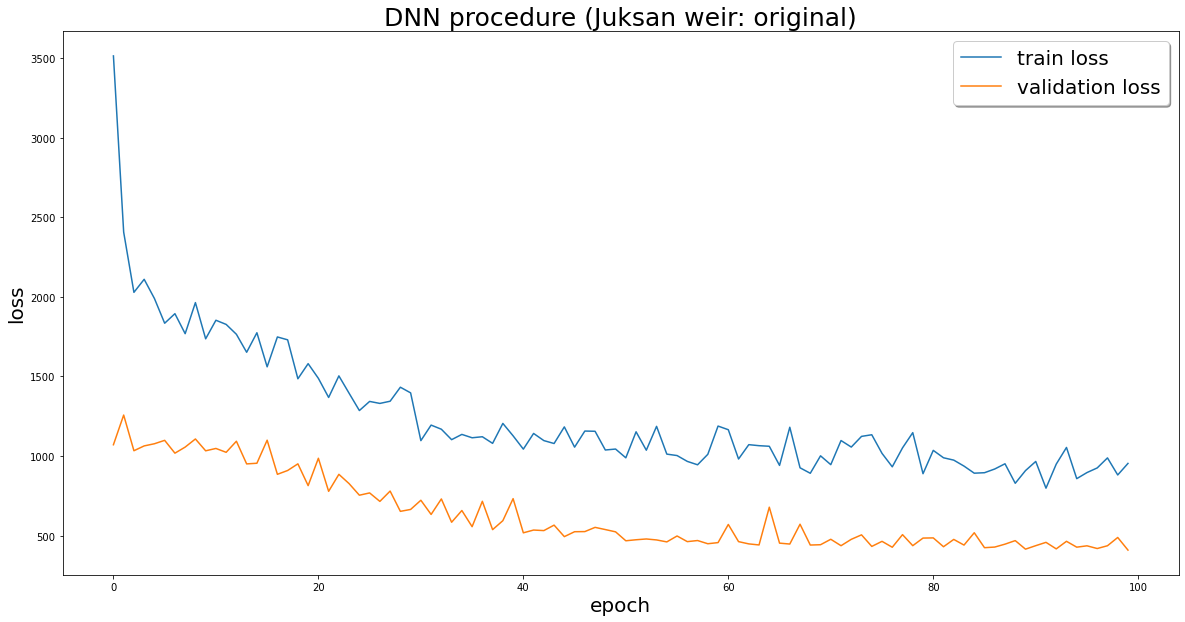

In [152]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_python.png')

In [153]:
# SMOTE
hist = model.fit(
    JS_train_x_sm, JS_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 799.9620 - mean_squared_error: 799.9620 - mean_absolute_error: 18.9577 - val_loss: 178.9591 - val_mean_squared_error: 178.9591 - val_mean_absolute_error: 9.4697 - 47ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 910.0579 - mean_squared_error: 910.0579 - mean_absolute_error: 20.5139 - val_loss: 106.7540 - val_mean_squared_error: 106.7540 - val_mean_absolute_error: 7.7059 - 25ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 934.6450 - mean_squared_error: 934.6450 - mean_absolute_error: 21.5765 - val_loss: 116.5256 - val_mean_squared_error: 116.5256 - val_mean_absolute_error: 8.2048 - 23ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 929.1138 - mean_squared_error: 929.1138 - mean_absolute_error: 21.5084 - val_loss: 134.4270 - val_mean_squared_error: 134.4270 - val_mean_absolute_error: 8.3885 - 25ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 960.2911 - mean_squared_error: 960.2911 - mean_absolute_error: 20.8839 - val_loss: 127.1388 - val_mean_sq

Epoch 39/100
14/14 - 0s - loss: 967.8960 - mean_squared_error: 967.8960 - mean_absolute_error: 19.8720 - val_loss: 76.7925 - val_mean_squared_error: 76.7925 - val_mean_absolute_error: 6.4413 - 24ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 859.6942 - mean_squared_error: 859.6942 - mean_absolute_error: 20.1246 - val_loss: 91.0375 - val_mean_squared_error: 91.0375 - val_mean_absolute_error: 7.4184 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 812.7275 - mean_squared_error: 812.7275 - mean_absolute_error: 19.7290 - val_loss: 99.9076 - val_mean_squared_error: 99.9076 - val_mean_absolute_error: 7.4322 - 24ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 847.5978 - mean_squared_error: 847.5978 - mean_absolute_error: 19.7250 - val_loss: 115.5201 - val_mean_squared_error: 115.5201 - val_mean_absolute_error: 8.1819 - 22ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 771.6050 - mean_squared_error: 771.6050 - mean_absolute_error: 19.2660 - val_loss: 114.5418 - val_mean_squ

Epoch 77/100
14/14 - 0s - loss: 861.7130 - mean_squared_error: 861.7130 - mean_absolute_error: 20.2149 - val_loss: 70.0236 - val_mean_squared_error: 70.0236 - val_mean_absolute_error: 6.1976 - 27ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 785.1287 - mean_squared_error: 785.1287 - mean_absolute_error: 19.0241 - val_loss: 87.6047 - val_mean_squared_error: 87.6047 - val_mean_absolute_error: 7.2280 - 25ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 771.9281 - mean_squared_error: 771.9281 - mean_absolute_error: 19.1994 - val_loss: 73.7544 - val_mean_squared_error: 73.7544 - val_mean_absolute_error: 6.2987 - 24ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 763.9263 - mean_squared_error: 763.9263 - mean_absolute_error: 19.1703 - val_loss: 74.6077 - val_mean_squared_error: 74.6077 - val_mean_absolute_error: 6.4325 - 24ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 745.4624 - mean_squared_error: 745.4624 - mean_absolute_error: 18.9508 - val_loss: 97.2639 - val_mean_square

In [154]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 996us/step - loss: 642.6663 - mean_squared_error: 642.6663 - mean_absolute_error: 17.0811
test_loss:  642.6663208007812
test_mae:  642.6663208007812


In [155]:
JS_test_y_pred_DNN_sm = model.predict(JS_test_x)
JS_test_y_pred_DNN_sm

2/2 [==============================] - 0s 997us/step


array([[ 31.257908 ],
       [ 37.417835 ],
       [125.27087  ],
       [ 69.458725 ],
       [ 28.679838 ],
       [ 22.657263 ],
       [ 23.099718 ],
       [ 29.443916 ],
       [ 21.001259 ],
       [ 33.76858  ],
       [ 23.9804   ],
       [ 18.811403 ],
       [ 26.707685 ],
       [ 58.548176 ],
       [ 22.73681  ],
       [ 39.067284 ],
       [ 59.415848 ],
       [ 30.04683  ],
       [ 35.132942 ],
       [ 30.85349  ],
       [ 21.622084 ],
       [ 14.632018 ],
       [  4.8425846],
       [  7.6102505],
       [ 62.287113 ],
       [ 52.428577 ],
       [ 56.482212 ],
       [ 32.20329  ],
       [ 17.115364 ],
       [ 56.600586 ],
       [ 42.40254  ],
       [ 12.6699295],
       [ 16.795809 ],
       [ 45.698093 ],
       [ 61.232048 ],
       [ 77.81024  ],
       [ 42.381615 ],
       [ 28.391106 ],
       [ 43.27899  ],
       [ 16.505577 ],
       [ 17.389748 ],
       [ 22.960632 ]], dtype=float32)

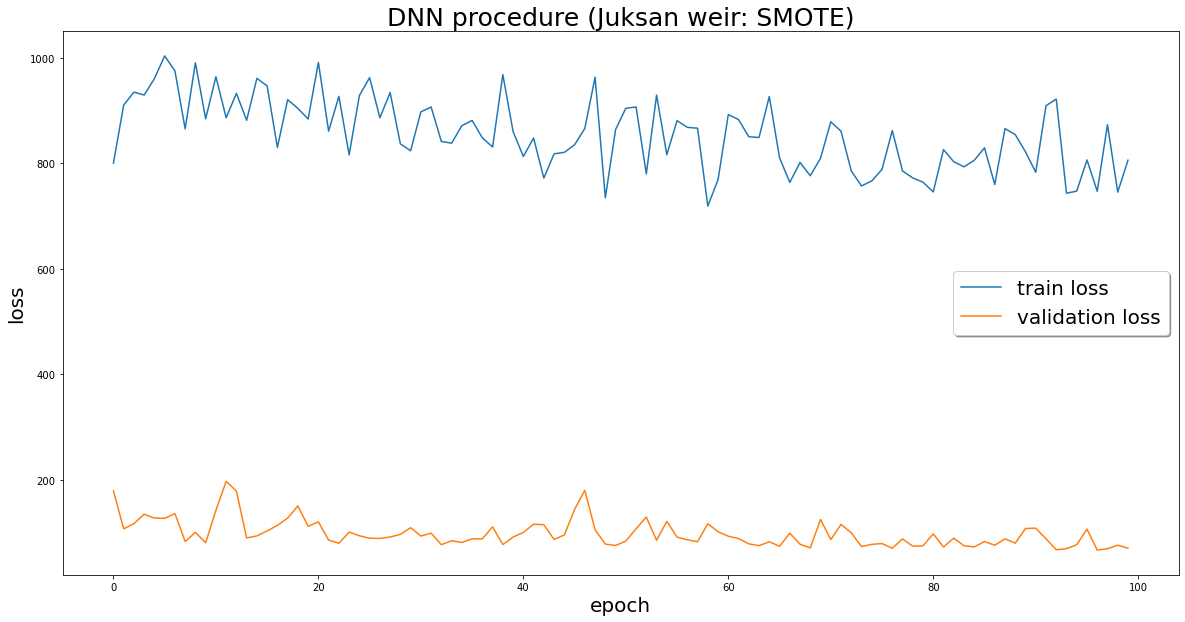

In [156]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_SMOTE_python.png')

In [157]:
# ADASYN
hist = model.fit(
    JS_train_x_ads, JS_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 716.4741 - mean_squared_error: 716.4741 - mean_absolute_error: 18.6125 - val_loss: 71.6081 - val_mean_squared_error: 71.6081 - val_mean_absolute_error: 6.3387 - 45ms/epoch - 3ms/step
Epoch 2/100
14/14 - 0s - loss: 764.5002 - mean_squared_error: 764.5002 - mean_absolute_error: 18.0073 - val_loss: 90.2248 - val_mean_squared_error: 90.2248 - val_mean_absolute_error: 7.1996 - 39ms/epoch - 3ms/step
Epoch 3/100
14/14 - 0s - loss: 722.1093 - mean_squared_error: 722.1093 - mean_absolute_error: 18.0875 - val_loss: 170.6840 - val_mean_squared_error: 170.6840 - val_mean_absolute_error: 10.5929 - 26ms/epoch - 2ms/step
Epoch 4/100
14/14 - 0s - loss: 720.6488 - mean_squared_error: 720.6488 - mean_absolute_error: 18.7130 - val_loss: 115.9480 - val_mean_squared_error: 115.9480 - val_mean_absolute_error: 8.5772 - 24ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 733.0181 - mean_squared_error: 733.0181 - mean_absolute_error: 18.3612 - val_loss: 106.0417 - val_mean_squar

Epoch 39/100
14/14 - 0s - loss: 691.9731 - mean_squared_error: 691.9731 - mean_absolute_error: 18.0692 - val_loss: 74.4894 - val_mean_squared_error: 74.4894 - val_mean_absolute_error: 6.2761 - 24ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 664.4132 - mean_squared_error: 664.4132 - mean_absolute_error: 18.0232 - val_loss: 88.8711 - val_mean_squared_error: 88.8711 - val_mean_absolute_error: 7.1382 - 24ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 655.1982 - mean_squared_error: 655.1982 - mean_absolute_error: 18.2493 - val_loss: 87.0663 - val_mean_squared_error: 87.0663 - val_mean_absolute_error: 7.1744 - 23ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 659.0996 - mean_squared_error: 659.0996 - mean_absolute_error: 17.3779 - val_loss: 75.8246 - val_mean_squared_error: 75.8246 - val_mean_absolute_error: 6.5688 - 26ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 618.7742 - mean_squared_error: 618.7742 - mean_absolute_error: 17.2014 - val_loss: 72.4870 - val_mean_square

Epoch 77/100
14/14 - 0s - loss: 645.2039 - mean_squared_error: 645.2039 - mean_absolute_error: 17.2866 - val_loss: 74.7771 - val_mean_squared_error: 74.7771 - val_mean_absolute_error: 6.4620 - 24ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 719.9152 - mean_squared_error: 719.9152 - mean_absolute_error: 17.9451 - val_loss: 88.2313 - val_mean_squared_error: 88.2313 - val_mean_absolute_error: 7.0976 - 23ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 605.9806 - mean_squared_error: 605.9806 - mean_absolute_error: 17.0312 - val_loss: 69.3804 - val_mean_squared_error: 69.3804 - val_mean_absolute_error: 6.1400 - 25ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 674.0704 - mean_squared_error: 674.0704 - mean_absolute_error: 17.8140 - val_loss: 82.1904 - val_mean_squared_error: 82.1904 - val_mean_absolute_error: 6.6691 - 25ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 620.4976 - mean_squared_error: 620.4976 - mean_absolute_error: 17.5805 - val_loss: 81.0281 - val_mean_square

In [158]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 973.8304 - mean_squared_error: 973.8304 - mean_absolute_error: 22.2762
test_loss:  973.8304443359375
test_mae:  973.8304443359375


In [159]:
JS_test_y_pred_DNN_ads = model.predict(JS_test_x)
JS_test_y_pred_DNN_ads

2/2 [==============================] - 0s 999us/step


array([[ 42.053417 ],
       [ 52.98566  ],
       [153.47325  ],
       [ 84.78165  ],
       [ 36.862736 ],
       [ 24.517014 ],
       [ 25.125639 ],
       [ 34.550053 ],
       [ 23.266195 ],
       [ 47.80795  ],
       [ 35.668262 ],
       [ 22.51457  ],
       [ 26.190008 ],
       [ 60.966595 ],
       [ 32.231243 ],
       [ 42.43533  ],
       [ 66.443054 ],
       [ 38.119648 ],
       [ 49.38114  ],
       [ 33.54494  ],
       [ 21.154305 ],
       [ 10.2851   ],
       [  8.427861 ],
       [  6.8747888],
       [ 77.823845 ],
       [ 69.668144 ],
       [ 65.20934  ],
       [ 40.061916 ],
       [ 12.815567 ],
       [ 66.5269   ],
       [ 51.03559  ],
       [  8.523722 ],
       [ 15.530797 ],
       [ 49.854603 ],
       [ 65.47596  ],
       [ 87.48672  ],
       [ 51.23627  ],
       [ 38.475956 ],
       [ 61.651463 ],
       [ 23.066599 ],
       [ 20.389652 ],
       [ 30.927277 ]], dtype=float32)

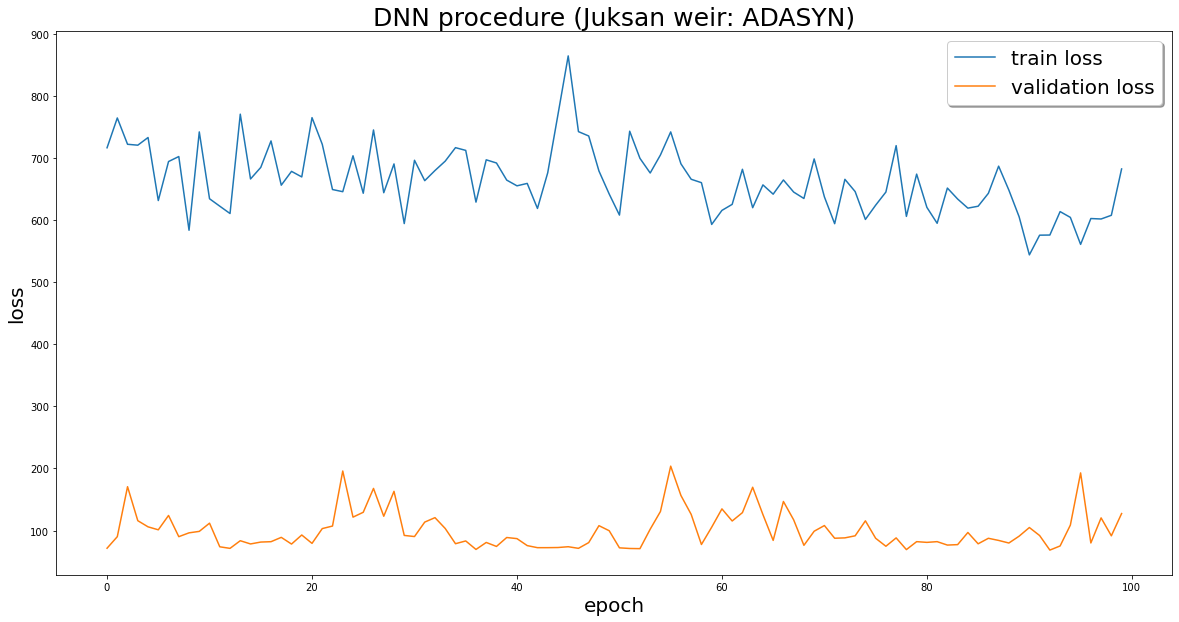

In [160]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_ADASYN_python.png')

In [161]:
# SMOTE-ENN
hist = model.fit(
    JS_train_x_sme, JS_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
6/6 - 0s - loss: 550.3172 - mean_squared_error: 550.3172 - mean_absolute_error: 14.8820 - val_loss: 207.3297 - val_mean_squared_error: 207.3297 - val_mean_absolute_error: 10.6270 - 45ms/epoch - 8ms/step
Epoch 2/100
6/6 - 0s - loss: 875.2411 - mean_squared_error: 875.2411 - mean_absolute_error: 16.8971 - val_loss: 216.7080 - val_mean_squared_error: 216.7080 - val_mean_absolute_error: 10.9663 - 20ms/epoch - 3ms/step
Epoch 3/100
6/6 - 0s - loss: 637.9299 - mean_squared_error: 637.9299 - mean_absolute_error: 15.6635 - val_loss: 237.3632 - val_mean_squared_error: 237.3632 - val_mean_absolute_error: 11.5352 - 20ms/epoch - 3ms/step
Epoch 4/100
6/6 - 0s - loss: 549.6369 - mean_squared_error: 549.6369 - mean_absolute_error: 15.0601 - val_loss: 233.4822 - val_mean_squared_error: 233.4822 - val_mean_absolute_error: 11.2606 - 19ms/epoch - 3ms/step
Epoch 5/100
6/6 - 0s - loss: 537.2860 - mean_squared_error: 537.2860 - mean_absolute_error: 14.8190 - val_loss: 244.8792 - val_mean_squared_

Epoch 39/100
6/6 - 0s - loss: 568.9296 - mean_squared_error: 568.9296 - mean_absolute_error: 14.4079 - val_loss: 201.3988 - val_mean_squared_error: 201.3988 - val_mean_absolute_error: 10.5686 - 20ms/epoch - 3ms/step
Epoch 40/100
6/6 - 0s - loss: 566.7211 - mean_squared_error: 566.7211 - mean_absolute_error: 15.2647 - val_loss: 218.2276 - val_mean_squared_error: 218.2276 - val_mean_absolute_error: 10.8356 - 19ms/epoch - 3ms/step
Epoch 41/100
6/6 - 0s - loss: 487.7684 - mean_squared_error: 487.7684 - mean_absolute_error: 14.4813 - val_loss: 206.0507 - val_mean_squared_error: 206.0507 - val_mean_absolute_error: 10.7038 - 19ms/epoch - 3ms/step
Epoch 42/100
6/6 - 0s - loss: 368.4155 - mean_squared_error: 368.4155 - mean_absolute_error: 12.9011 - val_loss: 246.3064 - val_mean_squared_error: 246.3064 - val_mean_absolute_error: 11.7165 - 20ms/epoch - 3ms/step
Epoch 43/100
6/6 - 0s - loss: 426.2637 - mean_squared_error: 426.2637 - mean_absolute_error: 12.9538 - val_loss: 188.1221 - val_mean_squ

Epoch 77/100
6/6 - 0s - loss: 444.0099 - mean_squared_error: 444.0099 - mean_absolute_error: 13.4574 - val_loss: 223.7269 - val_mean_squared_error: 223.7269 - val_mean_absolute_error: 10.9130 - 20ms/epoch - 3ms/step
Epoch 78/100
6/6 - 0s - loss: 519.1550 - mean_squared_error: 519.1550 - mean_absolute_error: 13.8494 - val_loss: 205.8845 - val_mean_squared_error: 205.8845 - val_mean_absolute_error: 10.8452 - 20ms/epoch - 3ms/step
Epoch 79/100
6/6 - 0s - loss: 412.3786 - mean_squared_error: 412.3786 - mean_absolute_error: 12.5932 - val_loss: 209.2837 - val_mean_squared_error: 209.2837 - val_mean_absolute_error: 10.7491 - 19ms/epoch - 3ms/step
Epoch 80/100
6/6 - 0s - loss: 567.4562 - mean_squared_error: 567.4562 - mean_absolute_error: 13.6025 - val_loss: 214.5779 - val_mean_squared_error: 214.5779 - val_mean_absolute_error: 10.9466 - 20ms/epoch - 3ms/step
Epoch 81/100
6/6 - 0s - loss: 430.8943 - mean_squared_error: 430.8943 - mean_absolute_error: 13.9911 - val_loss: 227.5520 - val_mean_squ

In [162]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 1ms/step - loss: 1431.6584 - mean_squared_error: 1431.6584 - mean_absolute_error: 25.8659
test_loss:  1431.658447265625
test_mae:  1431.658447265625


In [163]:
JS_test_y_pred_DNN_sme = model.predict(JS_test_x)
JS_test_y_pred_DNN_sme

2/2 [==============================] - 0s 997us/step


array([[ 48.911556 ],
       [ 64.61522  ],
       [173.44746  ],
       [103.118286 ],
       [ 45.15133  ],
       [ 26.937706 ],
       [ 27.324339 ],
       [ 33.296898 ],
       [ 23.303202 ],
       [ 40.47851  ],
       [ 26.510044 ],
       [ 20.08716  ],
       [ 19.90828  ],
       [ 64.84366  ],
       [ 25.998585 ],
       [ 54.40585  ],
       [ 76.751785 ],
       [ 33.589333 ],
       [ 46.512455 ],
       [ 38.929028 ],
       [ 17.330145 ],
       [  7.333857 ],
       [ 10.609476 ],
       [  8.478839 ],
       [ 92.99369  ],
       [ 79.86581  ],
       [ 75.614494 ],
       [ 52.383972 ],
       [ 12.174464 ],
       [ 50.09528  ],
       [ 63.637844 ],
       [  7.2371893],
       [ 15.35265  ],
       [ 57.173214 ],
       [ 73.67779  ],
       [ 97.634026 ],
       [ 50.41286  ],
       [ 33.91515  ],
       [ 97.43141  ],
       [ 18.619907 ],
       [ 18.749037 ],
       [ 22.736076 ]], dtype=float32)

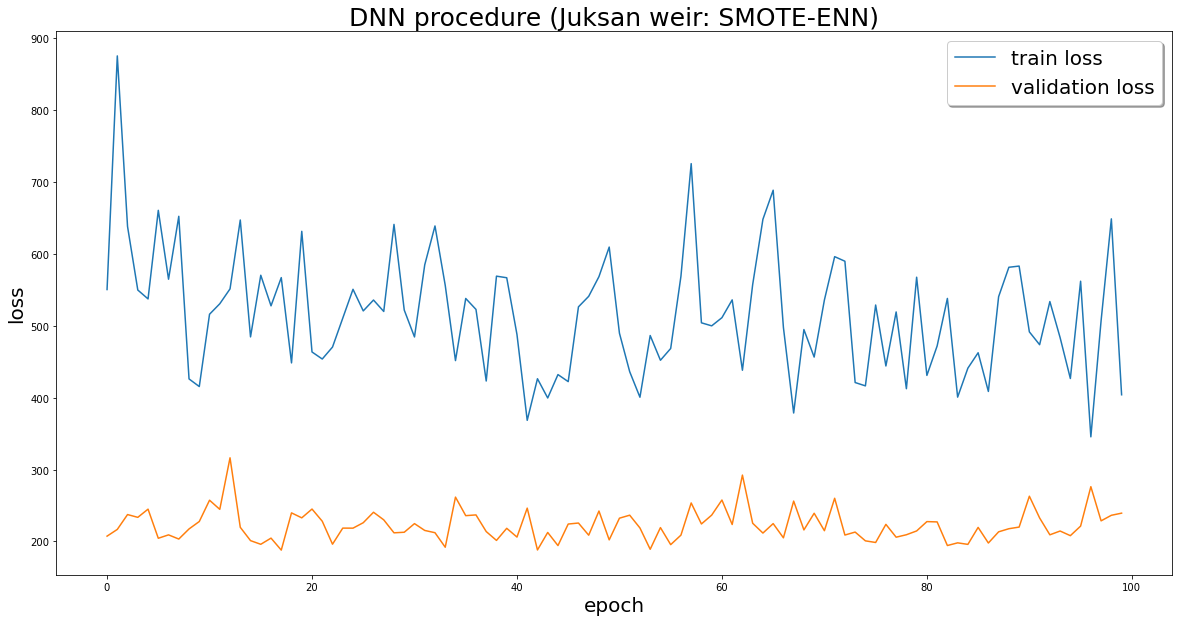

In [164]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_SMOTE-ENN_python.png')

In [165]:
# SMOTE-Tomek
hist = model.fit(
    JS_train_x_smt, JS_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
13/13 - 0s - loss: 620.3281 - mean_squared_error: 620.3281 - mean_absolute_error: 17.4663 - val_loss: 59.2841 - val_mean_squared_error: 59.2841 - val_mean_absolute_error: 5.6704 - 47ms/epoch - 4ms/step
Epoch 2/100
13/13 - 0s - loss: 751.3184 - mean_squared_error: 751.3184 - mean_absolute_error: 18.2180 - val_loss: 61.5377 - val_mean_squared_error: 61.5377 - val_mean_absolute_error: 5.6426 - 24ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 620.1695 - mean_squared_error: 620.1695 - mean_absolute_error: 17.3615 - val_loss: 62.3918 - val_mean_squared_error: 62.3918 - val_mean_absolute_error: 5.9501 - 24ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 691.3852 - mean_squared_error: 691.3852 - mean_absolute_error: 18.0579 - val_loss: 81.5548 - val_mean_squared_error: 81.5548 - val_mean_absolute_error: 6.7662 - 25ms/epoch - 2ms/step
Epoch 5/100
13/13 - 0s - loss: 664.6058 - mean_squared_error: 664.6058 - mean_absolute_error: 18.4897 - val_loss: 96.5063 - val_mean_squared_err

Epoch 40/100
13/13 - 0s - loss: 576.6610 - mean_squared_error: 576.6610 - mean_absolute_error: 16.0216 - val_loss: 69.4742 - val_mean_squared_error: 69.4742 - val_mean_absolute_error: 5.9634 - 23ms/epoch - 2ms/step
Epoch 41/100
13/13 - 0s - loss: 660.8271 - mean_squared_error: 660.8271 - mean_absolute_error: 17.1481 - val_loss: 88.6455 - val_mean_squared_error: 88.6455 - val_mean_absolute_error: 6.7363 - 24ms/epoch - 2ms/step
Epoch 42/100
13/13 - 0s - loss: 493.5578 - mean_squared_error: 493.5578 - mean_absolute_error: 15.9119 - val_loss: 61.4773 - val_mean_squared_error: 61.4773 - val_mean_absolute_error: 5.7724 - 23ms/epoch - 2ms/step
Epoch 43/100
13/13 - 0s - loss: 626.1306 - mean_squared_error: 626.1306 - mean_absolute_error: 17.1783 - val_loss: 61.5243 - val_mean_squared_error: 61.5243 - val_mean_absolute_error: 5.7424 - 23ms/epoch - 2ms/step
Epoch 44/100
13/13 - 0s - loss: 650.3358 - mean_squared_error: 650.3358 - mean_absolute_error: 17.6544 - val_loss: 119.9941 - val_mean_squar

Epoch 79/100
13/13 - 0s - loss: 726.6627 - mean_squared_error: 726.6627 - mean_absolute_error: 18.4597 - val_loss: 59.3079 - val_mean_squared_error: 59.3079 - val_mean_absolute_error: 5.4150 - 24ms/epoch - 2ms/step
Epoch 80/100
13/13 - 0s - loss: 575.6392 - mean_squared_error: 575.6392 - mean_absolute_error: 17.0525 - val_loss: 67.9618 - val_mean_squared_error: 67.9618 - val_mean_absolute_error: 5.9034 - 24ms/epoch - 2ms/step
Epoch 81/100
13/13 - 0s - loss: 502.2112 - mean_squared_error: 502.2112 - mean_absolute_error: 16.3419 - val_loss: 56.8569 - val_mean_squared_error: 56.8569 - val_mean_absolute_error: 5.4959 - 23ms/epoch - 2ms/step
Epoch 82/100
13/13 - 0s - loss: 540.1013 - mean_squared_error: 540.1013 - mean_absolute_error: 16.3154 - val_loss: 79.1844 - val_mean_squared_error: 79.1844 - val_mean_absolute_error: 6.2185 - 23ms/epoch - 2ms/step
Epoch 83/100
13/13 - 0s - loss: 534.6188 - mean_squared_error: 534.6188 - mean_absolute_error: 15.9159 - val_loss: 58.1544 - val_mean_square

In [166]:
scores = model.evaluate(JS_test_x, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 1060.0333 - mean_squared_error: 1060.0334 - mean_absolute_error: 21.3036
test_loss:  1060.0333251953125
test_mae:  1060.033447265625


In [167]:
JS_test_y_pred_DNN_smt = model.predict(JS_test_x)
JS_test_y_pred_DNN_smt

2/2 [==============================] - 0s 997us/step


array([[ 27.598284 ],
       [ 48.06504  ],
       [175.14923  ],
       [ 85.955246 ],
       [ 29.485779 ],
       [ 20.130245 ],
       [ 20.057508 ],
       [ 24.445957 ],
       [ 19.485048 ],
       [ 44.172707 ],
       [ 33.109985 ],
       [ 17.982077 ],
       [ 21.14436  ],
       [ 51.470024 ],
       [ 28.924948 ],
       [ 50.589214 ],
       [ 65.178894 ],
       [ 34.97867  ],
       [ 44.945854 ],
       [ 32.01338  ],
       [ 19.929174 ],
       [  7.8133583],
       [  6.6612263],
       [  6.352844 ],
       [ 78.48005  ],
       [ 71.83288  ],
       [ 69.84036  ],
       [ 40.54706  ],
       [ 11.505548 ],
       [ 59.128113 ],
       [ 56.067703 ],
       [  7.1728945],
       [ 15.278672 ],
       [ 45.68422  ],
       [ 60.141796 ],
       [ 76.37161  ],
       [ 42.690933 ],
       [ 32.39608  ],
       [ 52.599194 ],
       [ 21.18071  ],
       [ 20.407534 ],
       [ 26.68244  ]], dtype=float32)

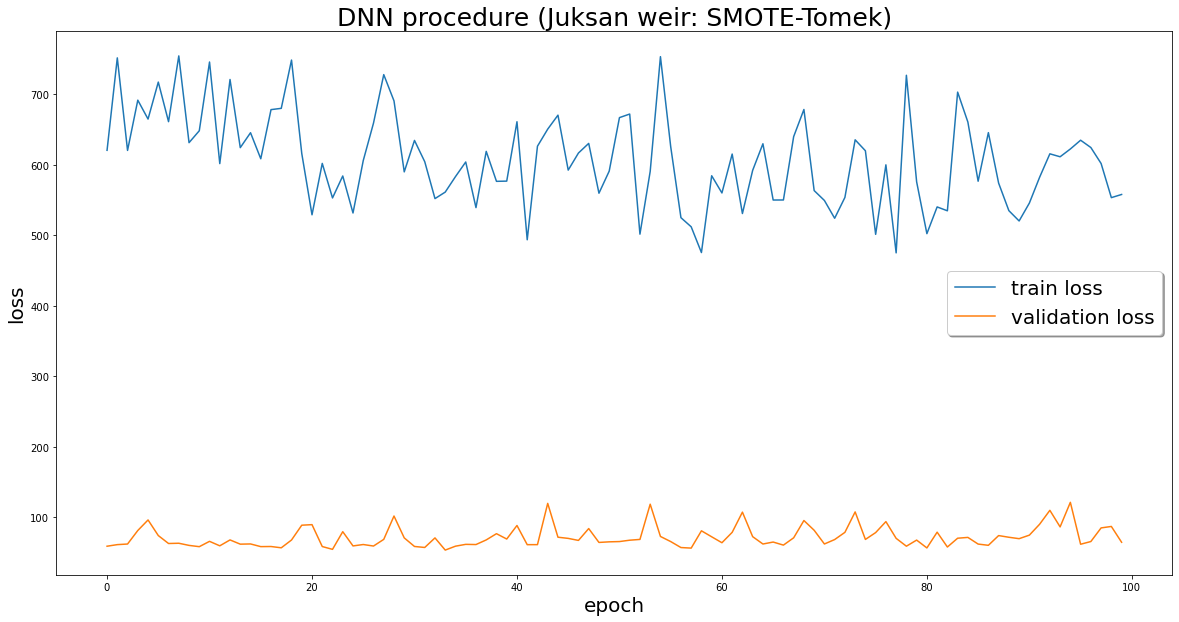

In [168]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('DNN procedure (Juksan weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('DNN JS_SMOTE-Tomek_python.png')

In [169]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

In [170]:
# CNN model (JS)
JS_train_x_CNN = JS_train_x.to_numpy().reshape(JS_train_x.shape[0], JS_train_x.shape[1], 1)
JS_train_x_sm_CNN = JS_train_x_sm.to_numpy().reshape(JS_train_x_sm.shape[0], JS_train_x_sm.shape[1], 1) # SMOTE
JS_train_x_ads_CNN = JS_train_x_ads.to_numpy().reshape(JS_train_x_ads.shape[0], JS_train_x_ads.shape[1], 1) # ADASYN
JS_train_x_sme_CNN = JS_train_x_sme.to_numpy().reshape(JS_train_x_sme.shape[0], JS_train_x_sme.shape[1], 1) # SMOTE-ENN
JS_train_x_smt_CNN = JS_train_x_smt.to_numpy().reshape(JS_train_x_smt.shape[0], JS_train_x_smt.shape[1], 1) # SMOTE-Tomek
JS_test_x_CNN = JS_test_x.to_numpy().reshape(JS_test_x.shape[0], JS_test_x.shape[1], 1) 

In [171]:
# model
model = tf.keras.Sequential()  
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(18, 1)))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(
        loss='mse',         # mean_squared_error(평균제곱오차)의 alias
        optimizer='adam',   # 최적화 기법 중 하나
        metrics=["mean_squared_error","mean_absolute_error"])    # 실험 후 관찰하고 싶은 metric 들을 나열함.

In [172]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 17, 64)            192       
                                                                 
 conv1d_5 (Conv1D)           (None, 15, 32)            6176      
                                                                 
 max_pooling1d_2 (MaxPoolin  (None, 7, 32)             0         
 g1D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 7, 32)             0         
                                                                 
 flatten_2 (Flatten)         (None, 224)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                7200      
                                                      

In [173]:
# original
hist = model.fit(
    JS_train_x_CNN, JS_train_y,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
9/9 - 1s - loss: 3208.7283 - mean_squared_error: 3208.7283 - mean_absolute_error: 39.6554 - val_loss: 1113.0981 - val_mean_squared_error: 1113.0981 - val_mean_absolute_error: 27.6921 - 607ms/epoch - 67ms/step
Epoch 2/100
9/9 - 0s - loss: 2134.9966 - mean_squared_error: 2134.9966 - mean_absolute_error: 34.6036 - val_loss: 1378.4004 - val_mean_squared_error: 1378.4004 - val_mean_absolute_error: 31.3981 - 35ms/epoch - 4ms/step
Epoch 3/100
9/9 - 0s - loss: 1767.1351 - mean_squared_error: 1767.1351 - mean_absolute_error: 31.0789 - val_loss: 1092.5831 - val_mean_squared_error: 1092.5831 - val_mean_absolute_error: 27.2325 - 28ms/epoch - 3ms/step
Epoch 4/100
9/9 - 0s - loss: 1877.1630 - mean_squared_error: 1877.1630 - mean_absolute_error: 30.7883 - val_loss: 1024.2065 - val_mean_squared_error: 1024.2065 - val_mean_absolute_error: 25.7464 - 30ms/epoch - 3ms/step
Epoch 5/100
9/9 - 0s - loss: 1815.4735 - mean_squared_error: 1815.4735 - mean_absolute_error: 31.5118 - val_loss: 1190.676

Epoch 39/100
9/9 - 0s - loss: 1282.0505 - mean_squared_error: 1282.0505 - mean_absolute_error: 25.2573 - val_loss: 777.8162 - val_mean_squared_error: 777.8162 - val_mean_absolute_error: 23.1633 - 27ms/epoch - 3ms/step
Epoch 40/100
9/9 - 0s - loss: 1143.0652 - mean_squared_error: 1143.0652 - mean_absolute_error: 24.0798 - val_loss: 779.7898 - val_mean_squared_error: 779.7898 - val_mean_absolute_error: 23.1275 - 28ms/epoch - 3ms/step
Epoch 41/100
9/9 - 0s - loss: 1215.2114 - mean_squared_error: 1215.2114 - mean_absolute_error: 24.3802 - val_loss: 719.3242 - val_mean_squared_error: 719.3242 - val_mean_absolute_error: 21.7287 - 28ms/epoch - 3ms/step
Epoch 42/100
9/9 - 0s - loss: 1212.2433 - mean_squared_error: 1212.2433 - mean_absolute_error: 24.4170 - val_loss: 883.1877 - val_mean_squared_error: 883.1877 - val_mean_absolute_error: 25.1240 - 27ms/epoch - 3ms/step
Epoch 43/100
9/9 - 0s - loss: 1265.7421 - mean_squared_error: 1265.7419 - mean_absolute_error: 25.1525 - val_loss: 681.3852 - va

Epoch 77/100
9/9 - 0s - loss: 957.9263 - mean_squared_error: 957.9263 - mean_absolute_error: 20.8888 - val_loss: 655.6455 - val_mean_squared_error: 655.6455 - val_mean_absolute_error: 20.4901 - 27ms/epoch - 3ms/step
Epoch 78/100
9/9 - 0s - loss: 953.1206 - mean_squared_error: 953.1206 - mean_absolute_error: 21.3706 - val_loss: 794.6129 - val_mean_squared_error: 794.6129 - val_mean_absolute_error: 23.2738 - 28ms/epoch - 3ms/step
Epoch 79/100
9/9 - 0s - loss: 986.5932 - mean_squared_error: 986.5932 - mean_absolute_error: 21.9414 - val_loss: 630.1791 - val_mean_squared_error: 630.1791 - val_mean_absolute_error: 20.1043 - 27ms/epoch - 3ms/step
Epoch 80/100
9/9 - 0s - loss: 899.7393 - mean_squared_error: 899.7393 - mean_absolute_error: 21.0696 - val_loss: 816.7393 - val_mean_squared_error: 816.7393 - val_mean_absolute_error: 23.8501 - 29ms/epoch - 3ms/step
Epoch 81/100
9/9 - 0s - loss: 974.3600 - mean_squared_error: 974.3600 - mean_absolute_error: 22.1695 - val_loss: 621.0416 - val_mean_squ

In [174]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 780.9210 - mean_squared_error: 780.9210 - mean_absolute_error: 21.7407
test_loss:  780.9209594726562
test_mae:  780.9209594726562


In [175]:
JS_test_y_pred_CNN = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN

2/2 [==============================] - 0s 502us/step


array([[ 57.27747  ],
       [ 78.51701  ],
       [113.853745 ],
       [ 73.6555   ],
       [ 53.884014 ],
       [ 40.672062 ],
       [ 47.154316 ],
       [ 58.42902  ],
       [ 36.190033 ],
       [ 44.879704 ],
       [ 34.52571  ],
       [ 26.418264 ],
       [ 28.267126 ],
       [ 61.944706 ],
       [ 55.095627 ],
       [ 21.14599  ],
       [ 52.793526 ],
       [ 51.73018  ],
       [ 79.2422   ],
       [ 20.24154  ],
       [ 23.24645  ],
       [ 13.680953 ],
       [  4.00429  ],
       [  6.8713226],
       [ 47.307983 ],
       [ 20.063906 ],
       [ 48.726677 ],
       [ 29.639673 ],
       [ 14.406838 ],
       [ 48.756252 ],
       [ 33.263805 ],
       [  8.143483 ],
       [ 26.246502 ],
       [ 55.98594  ],
       [ 70.98333  ],
       [ 90.557816 ],
       [ 73.17284  ],
       [ 49.71117  ],
       [ 35.52686  ],
       [ 32.893837 ],
       [ 23.01736  ],
       [ 27.019667 ]], dtype=float32)

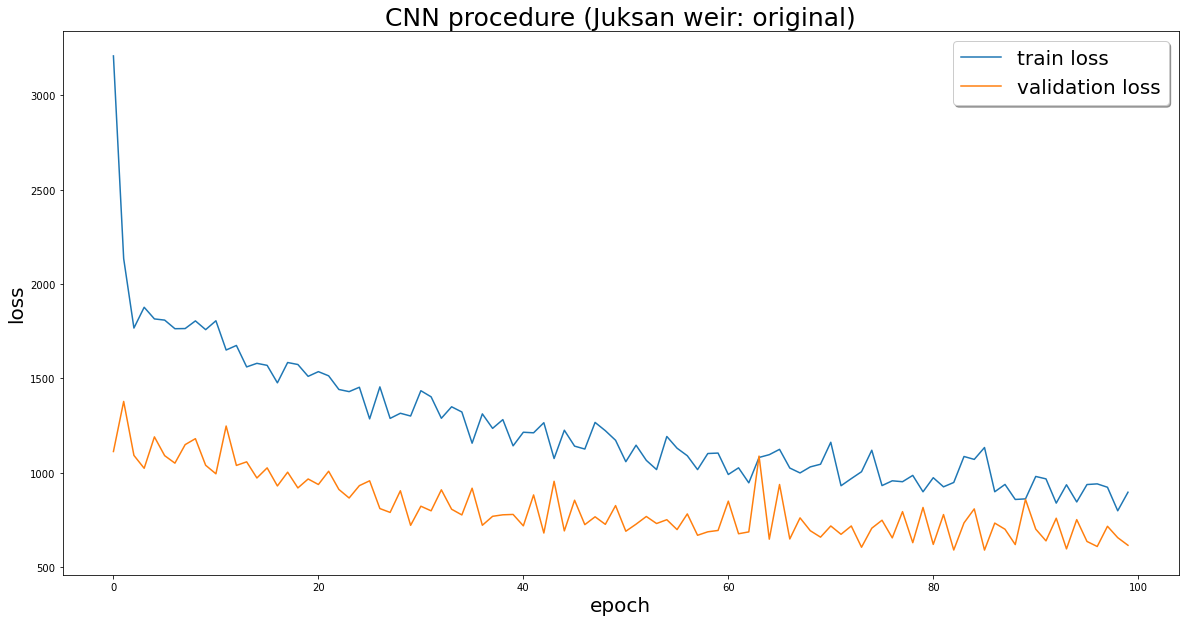

In [176]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: original)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_python.png')

In [177]:
# SMOTE
hist = model.fit(
    JS_train_x_sm_CNN, JS_train_y_sm,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 842.5391 - mean_squared_error: 842.5391 - mean_absolute_error: 21.0642 - val_loss: 413.2267 - val_mean_squared_error: 413.2267 - val_mean_absolute_error: 15.4806 - 54ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 1004.8410 - mean_squared_error: 1004.8410 - mean_absolute_error: 22.4397 - val_loss: 449.5992 - val_mean_squared_error: 449.5992 - val_mean_absolute_error: 16.1750 - 37ms/epoch - 3ms/step
Epoch 3/100
14/14 - 0s - loss: 956.7466 - mean_squared_error: 956.7466 - mean_absolute_error: 22.4956 - val_loss: 342.2111 - val_mean_squared_error: 342.2111 - val_mean_absolute_error: 13.9676 - 35ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 847.9400 - mean_squared_error: 847.9400 - mean_absolute_error: 21.4179 - val_loss: 315.3066 - val_mean_squared_error: 315.3066 - val_mean_absolute_error: 13.3717 - 35ms/epoch - 2ms/step
Epoch 5/100
14/14 - 0s - loss: 884.6760 - mean_squared_error: 884.6760 - mean_absolute_error: 21.8925 - val_loss: 282.5181 - val_m

Epoch 39/100
14/14 - 0s - loss: 798.1413 - mean_squared_error: 798.1413 - mean_absolute_error: 20.1675 - val_loss: 202.6715 - val_mean_squared_error: 202.6715 - val_mean_absolute_error: 10.8693 - 35ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 784.8493 - mean_squared_error: 784.8493 - mean_absolute_error: 19.8453 - val_loss: 195.0130 - val_mean_squared_error: 195.0130 - val_mean_absolute_error: 10.7948 - 34ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 856.0558 - mean_squared_error: 856.0558 - mean_absolute_error: 20.8708 - val_loss: 178.0988 - val_mean_squared_error: 178.0988 - val_mean_absolute_error: 10.4866 - 33ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 869.5157 - mean_squared_error: 869.5157 - mean_absolute_error: 20.7588 - val_loss: 235.9762 - val_mean_squared_error: 235.9762 - val_mean_absolute_error: 11.8096 - 34ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 826.1835 - mean_squared_error: 826.1835 - mean_absolute_error: 20.4664 - val_loss: 359.3641 - va

Epoch 77/100
14/14 - 0s - loss: 759.8987 - mean_squared_error: 759.8987 - mean_absolute_error: 19.5641 - val_loss: 205.8452 - val_mean_squared_error: 205.8452 - val_mean_absolute_error: 11.0221 - 34ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 649.0157 - mean_squared_error: 649.0157 - mean_absolute_error: 18.4813 - val_loss: 196.8975 - val_mean_squared_error: 196.8975 - val_mean_absolute_error: 10.7943 - 33ms/epoch - 2ms/step
Epoch 79/100
14/14 - 0s - loss: 691.1597 - mean_squared_error: 691.1597 - mean_absolute_error: 18.4248 - val_loss: 213.4361 - val_mean_squared_error: 213.4361 - val_mean_absolute_error: 11.0719 - 34ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 784.6929 - mean_squared_error: 784.6929 - mean_absolute_error: 20.7197 - val_loss: 187.6459 - val_mean_squared_error: 187.6459 - val_mean_absolute_error: 10.4632 - 34ms/epoch - 2ms/step
Epoch 81/100
14/14 - 0s - loss: 698.3991 - mean_squared_error: 698.3991 - mean_absolute_error: 19.1966 - val_loss: 172.1225 - va

In [178]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 808.0410 - mean_squared_error: 808.0410 - mean_absolute_error: 20.1370
test_loss:  808.041015625
test_mae:  808.041015625


In [179]:
JS_test_y_pred_CNN_sm = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_sm

2/2 [==============================] - 0s 996us/step


array([[ 38.256184 ],
       [ 64.35148  ],
       [126.77871  ],
       [ 77.6623   ],
       [ 41.079033 ],
       [ 19.138191 ],
       [ 18.960806 ],
       [ 52.809605 ],
       [ 30.5782   ],
       [ 34.56939  ],
       [ 22.98283  ],
       [ 14.727398 ],
       [ 34.092693 ],
       [ 68.45346  ],
       [ 42.74378  ],
       [ 23.719105 ],
       [ 52.648186 ],
       [ 51.79494  ],
       [ 70.261406 ],
       [ 27.960567 ],
       [ 23.282696 ],
       [ 17.096682 ],
       [  4.506567 ],
       [  7.5951505],
       [ 63.113087 ],
       [ 37.385384 ],
       [ 62.624233 ],
       [ 28.052113 ],
       [ 22.248436 ],
       [ 72.86751  ],
       [ 38.868267 ],
       [ 10.782076 ],
       [ 27.734947 ],
       [ 52.40342  ],
       [ 71.48225  ],
       [104.77483  ],
       [ 60.86916  ],
       [ 30.919542 ],
       [ 28.986452 ],
       [ 16.491848 ],
       [ 14.494686 ],
       [ 23.978683 ]], dtype=float32)

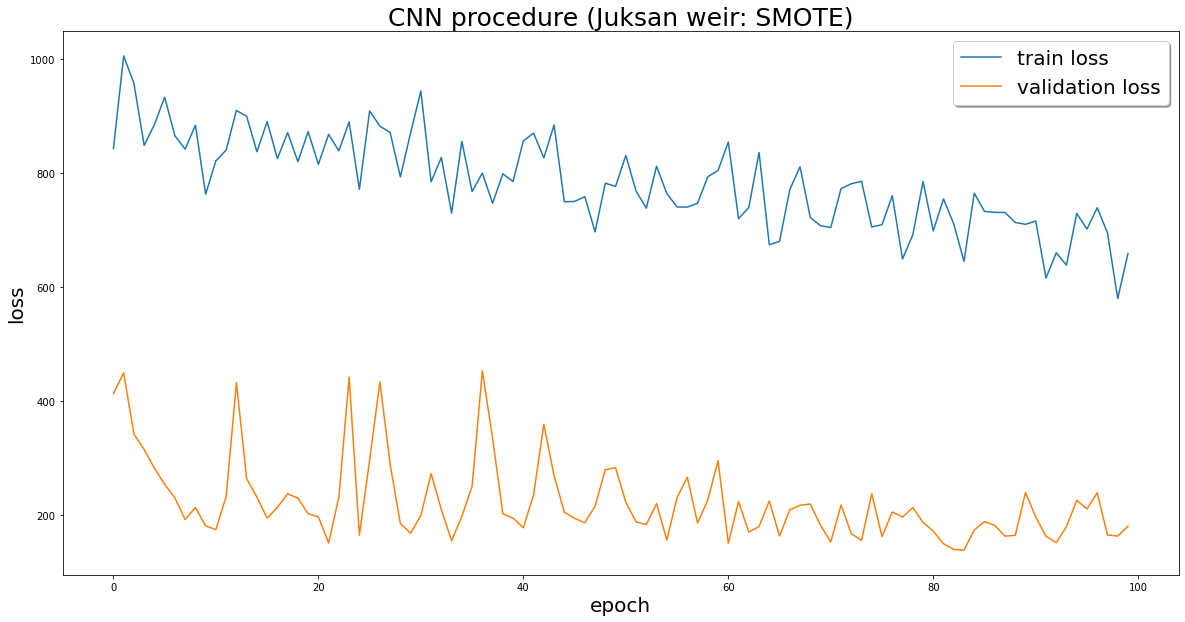

In [180]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: SMOTE)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_SMOTE_python.png')

In [181]:
# ADASYN
hist = model.fit(
    JS_train_x_ads_CNN, JS_train_y_ads,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
14/14 - 0s - loss: 613.4956 - mean_squared_error: 613.4956 - mean_absolute_error: 18.1060 - val_loss: 179.7709 - val_mean_squared_error: 179.7709 - val_mean_absolute_error: 9.3040 - 54ms/epoch - 4ms/step
Epoch 2/100
14/14 - 0s - loss: 601.3126 - mean_squared_error: 601.3126 - mean_absolute_error: 17.5754 - val_loss: 138.9214 - val_mean_squared_error: 138.9214 - val_mean_absolute_error: 8.3816 - 34ms/epoch - 2ms/step
Epoch 3/100
14/14 - 0s - loss: 672.7162 - mean_squared_error: 672.7162 - mean_absolute_error: 19.3058 - val_loss: 91.2752 - val_mean_squared_error: 91.2752 - val_mean_absolute_error: 7.3198 - 36ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 653.6990 - mean_squared_error: 653.6990 - mean_absolute_error: 18.6691 - val_loss: 91.2857 - val_mean_squared_error: 91.2857 - val_mean_absolute_error: 7.1382 - 36ms/epoch - 3ms/step
Epoch 5/100
14/14 - 0s - loss: 590.3183 - mean_squared_error: 590.3183 - mean_absolute_error: 17.6551 - val_loss: 144.1436 - val_mean_square

Epoch 39/100
14/14 - 0s - loss: 608.0538 - mean_squared_error: 608.0538 - mean_absolute_error: 17.6680 - val_loss: 89.1985 - val_mean_squared_error: 89.1985 - val_mean_absolute_error: 7.0645 - 33ms/epoch - 2ms/step
Epoch 40/100
14/14 - 0s - loss: 601.6581 - mean_squared_error: 601.6581 - mean_absolute_error: 17.5998 - val_loss: 99.8751 - val_mean_squared_error: 99.8751 - val_mean_absolute_error: 7.2387 - 34ms/epoch - 2ms/step
Epoch 41/100
14/14 - 0s - loss: 574.2512 - mean_squared_error: 574.2512 - mean_absolute_error: 17.1364 - val_loss: 97.6117 - val_mean_squared_error: 97.6117 - val_mean_absolute_error: 7.1843 - 34ms/epoch - 2ms/step
Epoch 42/100
14/14 - 0s - loss: 585.6910 - mean_squared_error: 585.6910 - mean_absolute_error: 17.2340 - val_loss: 76.5726 - val_mean_squared_error: 76.5726 - val_mean_absolute_error: 6.7814 - 34ms/epoch - 2ms/step
Epoch 43/100
14/14 - 0s - loss: 621.4709 - mean_squared_error: 621.4709 - mean_absolute_error: 17.9143 - val_loss: 98.5876 - val_mean_square

14/14 - 0s - loss: 543.0089 - mean_squared_error: 543.0089 - mean_absolute_error: 17.0045 - val_loss: 132.3391 - val_mean_squared_error: 132.3391 - val_mean_absolute_error: 8.5077 - 34ms/epoch - 2ms/step
Epoch 78/100
14/14 - 0s - loss: 532.8386 - mean_squared_error: 532.8386 - mean_absolute_error: 17.1392 - val_loss: 71.3704 - val_mean_squared_error: 71.3704 - val_mean_absolute_error: 6.4074 - 36ms/epoch - 3ms/step
Epoch 79/100
14/14 - 0s - loss: 566.0838 - mean_squared_error: 566.0838 - mean_absolute_error: 16.7458 - val_loss: 99.7538 - val_mean_squared_error: 99.7538 - val_mean_absolute_error: 7.4313 - 35ms/epoch - 2ms/step
Epoch 80/100
14/14 - 0s - loss: 570.7167 - mean_squared_error: 570.7167 - mean_absolute_error: 17.0834 - val_loss: 67.2737 - val_mean_squared_error: 67.2737 - val_mean_absolute_error: 6.1955 - 38ms/epoch - 3ms/step
Epoch 81/100
14/14 - 0s - loss: 544.6118 - mean_squared_error: 544.6118 - mean_absolute_error: 17.0104 - val_loss: 73.4687 - val_mean_squared_error: 73

In [182]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 857.7832 - mean_squared_error: 857.7832 - mean_absolute_error: 21.6782
test_loss:  857.783203125
test_mae:  857.783203125


In [183]:
JS_test_y_pred_CNN_ads = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_ads

2/2 [==============================] - 0s 996us/step


array([[ 42.148888 ],
       [ 61.76624  ],
       [137.9932   ],
       [ 80.469055 ],
       [ 48.963993 ],
       [ 25.923693 ],
       [ 22.81537  ],
       [ 49.393696 ],
       [ 36.22935  ],
       [ 39.40253  ],
       [ 30.92025  ],
       [ 26.151766 ],
       [ 33.62968  ],
       [ 69.27124  ],
       [ 43.38004  ],
       [ 27.42803  ],
       [ 53.87635  ],
       [ 52.86556  ],
       [ 60.41561  ],
       [ 31.347618 ],
       [ 24.481474 ],
       [ 14.895439 ],
       [  8.425983 ],
       [  6.0987606],
       [ 63.335854 ],
       [ 45.308144 ],
       [ 61.65967  ],
       [ 32.74678  ],
       [ 22.536886 ],
       [ 74.58476  ],
       [ 41.42196  ],
       [ 12.992794 ],
       [ 23.771935 ],
       [ 48.998573 ],
       [ 69.0304   ],
       [105.975525 ],
       [ 56.95762  ],
       [ 34.218994 ],
       [ 32.076687 ],
       [ 24.721273 ],
       [ 23.071379 ],
       [ 28.90328  ]], dtype=float32)

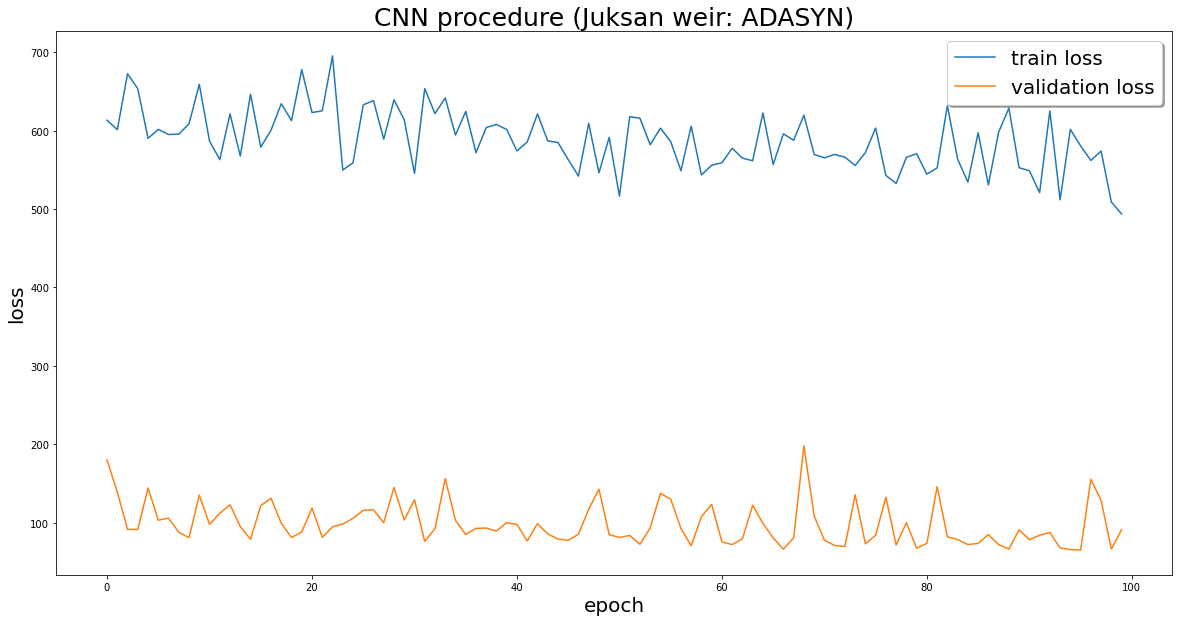

In [184]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: ADASYN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_ADASYN_python.png')

In [185]:
# SMOTE-ENN
hist = model.fit(
    JS_train_x_sme_CNN, JS_train_y_sme,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
6/6 - 0s - loss: 575.5301 - mean_squared_error: 575.5301 - mean_absolute_error: 17.3068 - val_loss: 266.4912 - val_mean_squared_error: 266.4912 - val_mean_absolute_error: 12.2622 - 41ms/epoch - 7ms/step
Epoch 2/100
6/6 - 0s - loss: 539.3676 - mean_squared_error: 539.3676 - mean_absolute_error: 16.2465 - val_loss: 263.8597 - val_mean_squared_error: 263.8597 - val_mean_absolute_error: 12.0223 - 23ms/epoch - 4ms/step
Epoch 3/100
6/6 - 0s - loss: 499.8294 - mean_squared_error: 499.8294 - mean_absolute_error: 15.1083 - val_loss: 295.1649 - val_mean_squared_error: 295.1649 - val_mean_absolute_error: 12.9523 - 23ms/epoch - 4ms/step
Epoch 4/100
6/6 - 0s - loss: 565.1586 - mean_squared_error: 565.1586 - mean_absolute_error: 16.1177 - val_loss: 265.1176 - val_mean_squared_error: 265.1176 - val_mean_absolute_error: 11.9513 - 25ms/epoch - 4ms/step
Epoch 5/100
6/6 - 0s - loss: 468.7768 - mean_squared_error: 468.7768 - mean_absolute_error: 16.0499 - val_loss: 268.7583 - val_mean_squared_

Epoch 39/100
6/6 - 0s - loss: 476.3828 - mean_squared_error: 476.3828 - mean_absolute_error: 15.0158 - val_loss: 268.4402 - val_mean_squared_error: 268.4402 - val_mean_absolute_error: 12.0518 - 23ms/epoch - 4ms/step
Epoch 40/100
6/6 - 0s - loss: 390.0526 - mean_squared_error: 390.0526 - mean_absolute_error: 13.4875 - val_loss: 264.1146 - val_mean_squared_error: 264.1146 - val_mean_absolute_error: 11.9468 - 26ms/epoch - 4ms/step
Epoch 41/100
6/6 - 0s - loss: 551.9306 - mean_squared_error: 551.9306 - mean_absolute_error: 15.9291 - val_loss: 237.4942 - val_mean_squared_error: 237.4942 - val_mean_absolute_error: 11.3649 - 24ms/epoch - 4ms/step
Epoch 42/100
6/6 - 0s - loss: 444.9546 - mean_squared_error: 444.9546 - mean_absolute_error: 14.0625 - val_loss: 245.9645 - val_mean_squared_error: 245.9645 - val_mean_absolute_error: 11.4567 - 23ms/epoch - 4ms/step
Epoch 43/100
6/6 - 0s - loss: 450.5565 - mean_squared_error: 450.5565 - mean_absolute_error: 14.5128 - val_loss: 260.7334 - val_mean_squ

Epoch 77/100
6/6 - 0s - loss: 305.8570 - mean_squared_error: 305.8570 - mean_absolute_error: 11.9653 - val_loss: 290.4177 - val_mean_squared_error: 290.4177 - val_mean_absolute_error: 12.4311 - 23ms/epoch - 4ms/step
Epoch 78/100
6/6 - 0s - loss: 514.6606 - mean_squared_error: 514.6606 - mean_absolute_error: 14.1503 - val_loss: 295.6501 - val_mean_squared_error: 295.6501 - val_mean_absolute_error: 12.4258 - 24ms/epoch - 4ms/step
Epoch 79/100
6/6 - 0s - loss: 455.4395 - mean_squared_error: 455.4395 - mean_absolute_error: 13.7784 - val_loss: 278.7056 - val_mean_squared_error: 278.7056 - val_mean_absolute_error: 12.2121 - 23ms/epoch - 4ms/step
Epoch 80/100
6/6 - 0s - loss: 339.1832 - mean_squared_error: 339.1832 - mean_absolute_error: 12.6658 - val_loss: 273.6238 - val_mean_squared_error: 273.6238 - val_mean_absolute_error: 11.9784 - 23ms/epoch - 4ms/step
Epoch 81/100
6/6 - 0s - loss: 331.8249 - mean_squared_error: 331.8249 - mean_absolute_error: 12.7110 - val_loss: 247.3817 - val_mean_squ

In [186]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 1071.2158 - mean_squared_error: 1071.2158 - mean_absolute_error: 23.8616
test_loss:  1071.2158203125
test_mae:  1071.2158203125


In [187]:
JS_test_y_pred_CNN_sme = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_sme

2/2 [==============================] - 0s 994us/step


array([[ 54.79001  ],
       [ 91.94514  ],
       [152.82588  ],
       [ 96.013725 ],
       [ 57.05889  ],
       [ 26.88778  ],
       [ 21.083252 ],
       [ 47.52341  ],
       [ 38.44416  ],
       [ 48.45245  ],
       [ 32.5982   ],
       [ 23.13976  ],
       [ 23.1156   ],
       [ 66.9041   ],
       [ 42.559975 ],
       [ 20.380754 ],
       [ 73.85221  ],
       [ 57.477936 ],
       [ 62.99082  ],
       [ 19.320827 ],
       [ 16.797354 ],
       [  7.153714 ],
       [  7.00757  ],
       [  4.576198 ],
       [ 62.08519  ],
       [ 51.810555 ],
       [ 61.91002  ],
       [ 33.2299   ],
       [ 10.577225 ],
       [ 83.54433  ],
       [ 41.143715 ],
       [  5.4172516],
       [ 13.7784395],
       [ 44.21498  ],
       [ 71.77743  ],
       [106.65626  ],
       [ 61.381004 ],
       [ 37.641373 ],
       [ 39.932064 ],
       [ 24.672361 ],
       [ 21.347622 ],
       [ 24.66421  ]], dtype=float32)

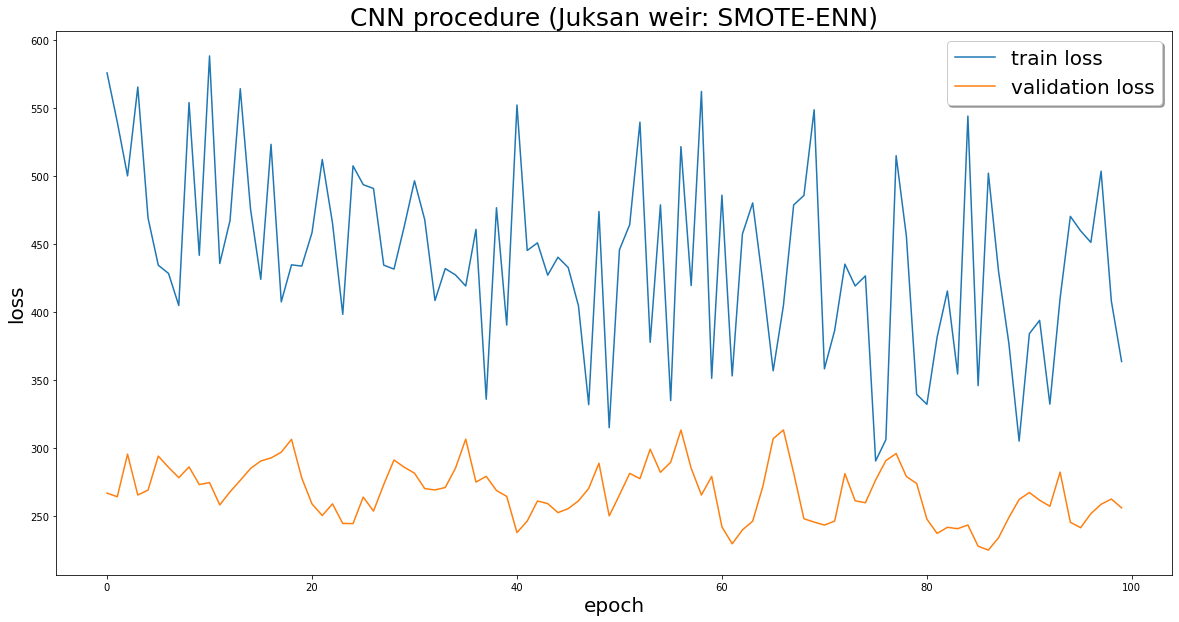

In [188]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: SMOTE-ENN)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_SMOTE_ENN_python.png')

In [189]:
# SMOTE-Tomek
hist = model.fit(
    JS_train_x_smt_CNN, JS_train_y_smt,   
    epochs=100,       
    validation_split=0.2,   
    verbose=2) 

Epoch 1/100
13/13 - 0s - loss: 659.5941 - mean_squared_error: 659.5941 - mean_absolute_error: 17.9244 - val_loss: 88.4037 - val_mean_squared_error: 88.4037 - val_mean_absolute_error: 7.4591 - 52ms/epoch - 4ms/step
Epoch 2/100
13/13 - 0s - loss: 618.7480 - mean_squared_error: 618.7480 - mean_absolute_error: 18.3032 - val_loss: 82.7195 - val_mean_squared_error: 82.7195 - val_mean_absolute_error: 7.0084 - 31ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 600.0236 - mean_squared_error: 600.0236 - mean_absolute_error: 16.9279 - val_loss: 95.2328 - val_mean_squared_error: 95.2328 - val_mean_absolute_error: 7.9672 - 32ms/epoch - 2ms/step
Epoch 4/100
13/13 - 0s - loss: 615.2115 - mean_squared_error: 615.2115 - mean_absolute_error: 17.8725 - val_loss: 101.3061 - val_mean_squared_error: 101.3061 - val_mean_absolute_error: 8.2111 - 34ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 572.4577 - mean_squared_error: 572.4577 - mean_absolute_error: 16.7542 - val_loss: 107.2843 - val_mean_squared_

13/13 - 0s - loss: 644.7644 - mean_squared_error: 644.7644 - mean_absolute_error: 17.9000 - val_loss: 93.3041 - val_mean_squared_error: 93.3041 - val_mean_absolute_error: 7.7880 - 32ms/epoch - 2ms/step
Epoch 40/100
13/13 - 0s - loss: 646.9719 - mean_squared_error: 646.9719 - mean_absolute_error: 17.5778 - val_loss: 79.7906 - val_mean_squared_error: 79.7906 - val_mean_absolute_error: 7.2106 - 32ms/epoch - 2ms/step
Epoch 41/100
13/13 - 0s - loss: 591.0693 - mean_squared_error: 591.0693 - mean_absolute_error: 18.0407 - val_loss: 65.5244 - val_mean_squared_error: 65.5244 - val_mean_absolute_error: 6.4574 - 32ms/epoch - 2ms/step
Epoch 42/100
13/13 - 0s - loss: 525.5116 - mean_squared_error: 525.5116 - mean_absolute_error: 16.8733 - val_loss: 70.1215 - val_mean_squared_error: 70.1215 - val_mean_absolute_error: 6.6666 - 32ms/epoch - 2ms/step
Epoch 43/100
13/13 - 0s - loss: 459.4878 - mean_squared_error: 459.4878 - mean_absolute_error: 16.0105 - val_loss: 83.5113 - val_mean_squared_error: 83.5

Epoch 78/100
13/13 - 0s - loss: 546.3489 - mean_squared_error: 546.3489 - mean_absolute_error: 16.5855 - val_loss: 70.7517 - val_mean_squared_error: 70.7517 - val_mean_absolute_error: 6.6662 - 34ms/epoch - 3ms/step
Epoch 79/100
13/13 - 0s - loss: 468.4469 - mean_squared_error: 468.4469 - mean_absolute_error: 16.4181 - val_loss: 66.9895 - val_mean_squared_error: 66.9895 - val_mean_absolute_error: 6.4120 - 33ms/epoch - 3ms/step
Epoch 80/100
13/13 - 0s - loss: 571.6986 - mean_squared_error: 571.6986 - mean_absolute_error: 17.0971 - val_loss: 75.3622 - val_mean_squared_error: 75.3622 - val_mean_absolute_error: 6.9909 - 37ms/epoch - 3ms/step
Epoch 81/100
13/13 - 0s - loss: 532.3391 - mean_squared_error: 532.3391 - mean_absolute_error: 16.9986 - val_loss: 71.8563 - val_mean_squared_error: 71.8563 - val_mean_absolute_error: 6.7535 - 32ms/epoch - 2ms/step
Epoch 82/100
13/13 - 0s - loss: 552.8602 - mean_squared_error: 552.8602 - mean_absolute_error: 17.2432 - val_loss: 64.7985 - val_mean_square

In [190]:
scores = model.evaluate(JS_test_x_CNN, JS_test_y)
print('test_loss: ', scores[0])
print('test_mae: ', scores[1])

2/2 [==============================] - 0s 2ms/step - loss: 998.0248 - mean_squared_error: 998.0248 - mean_absolute_error: 21.6000
test_loss:  998.0248413085938
test_mae:  998.0248413085938


In [191]:
JS_test_y_pred_CNN_smt = model.predict(JS_test_x_CNN)
JS_test_y_pred_CNN_smt

2/2 [==============================] - 0s 2ms/step


array([[ 30.499565 ],
       [ 52.626144 ],
       [152.93767  ],
       [ 76.9099   ],
       [ 34.527264 ],
       [ 19.178705 ],
       [ 13.19357  ],
       [ 41.426205 ],
       [ 33.732906 ],
       [ 41.622906 ],
       [ 31.038294 ],
       [ 23.538244 ],
       [ 34.277668 ],
       [ 72.401794 ],
       [ 37.307705 ],
       [ 20.149517 ],
       [ 66.17562  ],
       [ 49.524925 ],
       [ 52.05147  ],
       [ 23.546274 ],
       [ 21.220743 ],
       [  5.8716116],
       [  4.186514 ],
       [  3.5238972],
       [ 69.84505  ],
       [ 42.61806  ],
       [ 73.53363  ],
       [ 37.85458  ],
       [  8.805264 ],
       [ 78.71431  ],
       [ 52.1256   ],
       [  5.378144 ],
       [ 15.771263 ],
       [ 50.292164 ],
       [ 73.998314 ],
       [108.89893  ],
       [ 56.33995  ],
       [ 34.91322  ],
       [ 31.505575 ],
       [ 22.932768 ],
       [ 22.284742 ],
       [ 26.99468  ]], dtype=float32)

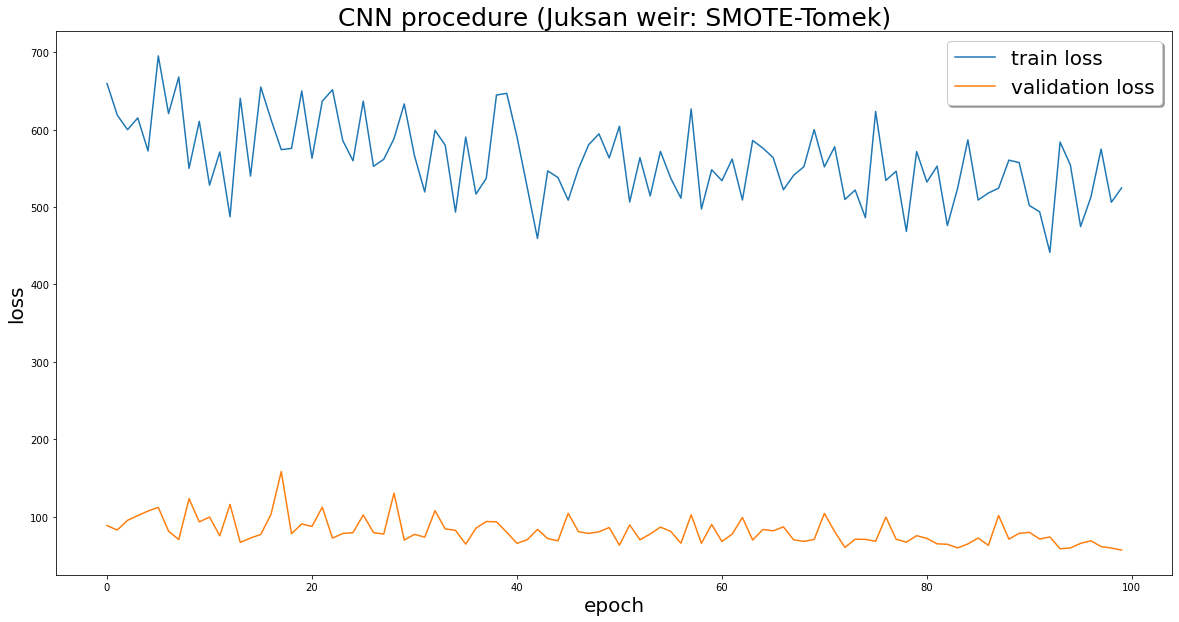

In [192]:
# checking loss
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

plt.plot(range(100), hist.history['loss'], label='train loss')
plt.plot(range(100), hist.history['val_loss'], label='validation loss')

plt.xlabel('epoch', fontsize=20)
plt.ylabel('loss', fontsize=20)
plt.title('CNN procedure (Juksan weir: SMOTE-Tomek)', fontsize=25)
plt.legend(fontsize=20, frameon=True, shadow=True)
# plt.show()

plt.savefig('CNN JS_SMOTE_Tomek_python.png')

In [193]:
JS_test_y = np.array(JS_test_y, dtype=np.float32)

In [194]:
### write data
import pandas as pd

df_JS = pd.DataFrame([JS_test_y, JS_test_y_pred_DNN, JS_test_y_pred_DNN_sm, 
                      JS_test_y_pred_DNN_ads, JS_test_y_pred_DNN_sme, JS_test_y_pred_DNN_smt,
                      JS_test_y_pred_CNN, JS_test_y_pred_CNN_sm, 
                      JS_test_y_pred_CNN_ads, JS_test_y_pred_CNN_sme, JS_test_y_pred_CNN_smt]).T
df_JS.columns = ['Chla', 'DNN', 'DNN_SMOTE', 'DNN_ADASYN', 'DNN_SMOTE_ENN', 'DNN_SMOTE_Tomek',
                 'CNN', 'CNN_SMOTE', 'CNN_ADASYN', 'CNN_SMOTE_ENN', 'CNN_SMOTE_Tomek']
df_JS.to_csv('df_JS_res.csv', index=False, encoding='cp949')